In [1]:
import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
from attwizard.script.utils import read_data_in_parallel
from attwizard.script.utils import load_json_file

In [3]:
%load_ext autoreload
%autoreload 2

**Goal**: here we inspect multiple visualization of the matrices and see when the good and bad cases are.

In [4]:
HUMAN_EXPERIMENT = "eye_v10" 
HUMAN_FOLDER = f"../data/eye_tracking_attention/{HUMAN_EXPERIMENT}"
COMPARISON_FOLDER = "cmp_v02"
MACHINE_EXPERIMENT = 'exp_v10'
MACHINE_FOLDER = f"../data/model_output/{MACHINE_EXPERIMENT}/codegen/"
experiments = os.listdir(MACHINE_FOLDER)
experiments  

['followup_scaled',
 'att_copy_cat_matrix',
 'att_uniform_matrix',
 'naive_mean',
 'answers',
 'generated_sequence',
 'followup',
 'vector_naive_max_plus_mean_of_followers',
 'att_trans_layer_matrix_left_100_100',
 'att_trans_layer_matrix_left_100_50',
 'att_trans_layer_matrix_left_100_0',
 'att_trans_layer_matrix_left_50_100',
 'att_trans_layer_matrix_left_50_50',
 'att_trans_layer_matrix_left_50_0',
 'att_trans_layer_matrix_left_0_100',
 'att_trans_layer_matrix_left_0_50',
 'att_trans_layer_matrix_left_0_0',
 'naive_max',
 'att_trans_layer_matrix_right',
 'att_roll_layer_matrix',
 'metadata',
 'att_trans_layer_matrix_left',
 'att_tensor',
 'att_flow_layer_matrix',
 'machine_answers.csv']

In [5]:
# matrices = load_all_matrices(experiments)
# matrices.keys()

# Read Data

In [6]:
# LOAD ALL DATA
PATH_COMPARISON_FOLDER = f'../data/comparisons/{COMPARISON_FOLDER}/'
available_comparisons = os.listdir(PATH_COMPARISON_FOLDER)
dfs = []
for comparison in available_comparisons:
    dfs.append(pd.read_csv(os.path.join(PATH_COMPARISON_FOLDER, comparison)))
DF = pd.concat(dfs)
DF["comparison_name"].unique()

array(['tl_mse_uniform', 'naive_max_matrix_mrr',
       'followup_matrix_hr_no_spaces_nor_eol', 'rollout_matrix',
       'followup_matrix_spearman_rank', 'followup_matrix_line',
       'tl_rank_followup', 'tl_rank_followupscaled',
       'followup_matrix_mrr', 'tl_rank_uniform', 'tt_rank_uniform',
       'tl_rank_copycat', 'naive_max_matrix_hr_no_spaces_nor_eol',
       'naive_max_matrix_line', 'followup_matrix_jsd', 'uniform_baseline',
       'tt_harmrank_copycat', 'tt_mse_followupscaled', 'followup_matrix',
       'followup_matrix_harmonic_rank', 'transitive_matrix_right',
       'plain_weights', 'naive_max_matrix_spearman_rank',
       'tt_rank_naivemax', 'transitive_matrix_left', 'tt_rank_followup',
       'followup_matrix_harmonic_rank_backward', 'naive_max_matrix_jsd',
       'naive_max_matrix_harmonic_rank_line', 'tt_rank_followupscaled',
       'tl_harmrank_copycat', 'naive_max_matrix_harmonic_rank',
       'tt_mse_copycat', 'followup_matrix_harmonic_rank_line',
       'naive_m

In [7]:
# Example 1
FILE_NAME_MACHINE = "triangle_Q2.py_0_Salesforce_codegen-16B-multi"
FILE_NAME_HUMAN = "b595bc" # "9bcda0"
OTHER_FILE_NAME_HUMAN = "5bf279"

In [8]:
# Example 2
FILE_NAME_MACHINE = "Nqueens_Q3.cpp_0_Salesforce_codegen-16B-multi"
FILE_NAME_HUMAN = "ab1e99" 
OTHER_FILE_NAME_HUMAN = "e0495f"

In [9]:
# MACHINE
MACHINE_FILE_PATH = f"../data/model_output/exp_v10/codegen/att_tensor/{FILE_NAME_MACHINE}.npy"
MATADATA_MACHINE_FILE_PATH = f"../data/model_output/exp_v10/codegen/metadata/{FILE_NAME_MACHINE}.json" 

# HUMAN
PATH_MODEL_TOKENIZATION = f"../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/decay_0.1/data_followup_tokens_tokens_model/metadata/{FILE_NAME_HUMAN}.json"
HUMAN_FILE_PATH = f'../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/decay_0.1/data_followup_tokens_tokens_model/{FILE_NAME_HUMAN}.npy'
OTHER_HUMAN_FILE_PATH = f'../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/decay_0.1/data_followup_tokens_tokens_model/{OTHER_FILE_NAME_HUMAN}.npy'
METADATA_HUMAN_FILE_PATH = f'../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/metadata/{FILE_NAME_HUMAN}.json'
HUMAN_VECTOR_FILE_PATH = f'../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/att_weights/{FILE_NAME_HUMAN}.npy'
OTHER_HUMAN_VECTOR_FILE_PATH = f'../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/att_weights/{OTHER_FILE_NAME_HUMAN}.npy'

machine_data = np.load(MACHINE_FILE_PATH)
human_data = np.load(HUMAN_FILE_PATH)
other_human_data = np.load(OTHER_HUMAN_FILE_PATH)
human_vector = np.load(HUMAN_VECTOR_FILE_PATH)
other_human_vector = np.load(OTHER_HUMAN_VECTOR_FILE_PATH)
machine_metadata = load_json_file(MATADATA_MACHINE_FILE_PATH)
human_metadata = load_json_file(METADATA_HUMAN_FILE_PATH)

import json
from attwizard.aligner import get_tokens_with_col_and_line
PATH_MODEL_TOKENIZATION = f"../data/eye_tracking_attention/{HUMAN_EXPERIMENT}/decay_0.1/data_followup_tokens_tokens_model/metadata/{FILE_NAME_HUMAN}.json"
model_tok = json.load(open(PATH_MODEL_TOKENIZATION, "r"))["model_tokens"]
model_tokenization = get_tokens_with_col_and_line(
    human_metadata["raw_text"], model_tok)

In [10]:
entire_text = "".join([t["t"] for t in model_tokenization])
MODEL_FOLDER = "/mnt/huggingface_models"
HUGGING_FACE_REPO = "Salesforce/codegen-350M-mono"
from transformers import AutoTokenizer
from attwizard.script.utils import get_model_folder_path

model_folder_path = get_model_folder_path(
    model_folder=MODEL_FOLDER,
    hugging_short_repo=HUGGING_FACE_REPO
)

tokenizer = AutoTokenizer.from_pretrained(model_folder_path)
tmp = tokenizer(entire_text, return_tensors="pt")
input_ids = tmp['input_ids']

tokens_prompt = tokenizer.convert_ids_to_tokens(input_ids[0])

In [11]:
human_metadata.keys()

dict_keys(['user_name', 'task_number', 'source_code', 'tokenization', 'raw_text'])

In [12]:
machine_metadata.keys()

dict_keys(['tokens_all', 'tokens_prompt', 'tokens_generated', 'text_generated', 'text_prompt', 'generation_time_seconds', 'source_file', 'mode_name', 'config_options'])

In [13]:
print("According to the machine, the tokens of the prompt were: ", len(machine_metadata["tokens_prompt"]))
print("According to the machine, all the tokens (including the generated ones) were: ", len(machine_metadata["tokens_all"]))

According to the machine, the tokens of the prompt were:  597
According to the machine, all the tokens (including the generated ones) were:  697


In [14]:
human_vector.shape

(1736,)

In [15]:
machine_data.shape

(34, 24, 696, 696)

In [16]:
all_machine_metadata = read_data_in_parallel(
    base_folder=os.path.join(MACHINE_FOLDER, 'metadata'),
    file_type_extension=".json",
    read_function=load_json_file)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

# Pick examples from Comparisons

In [17]:
from attwizard.analysis_pass.data_helper import explode_column_with_list_of_tuples

In [36]:
LINE_LEVEL =  True
TARGET_ATT = {
    #"name_comparison": "tt_rank_naivemax",
    #"data_folder": "naive_max",
    "name_comparison": "tt_rank_followup",
    "data_folder": "followup",
    #"name_comparison": "tt_rank_copycat",
    #"data_folder": "att_copy_cat_matrix",
    "ground_truth_folder": os.path.join("decay_0.1", "data_followup_tokens_tokens_model"),
    "columns_to_explode": ["rank_list"],
}

In [37]:
# pick some examples
df_comparison = DF[DF["comparison_name"] == TARGET_ATT["name_comparison"]]
df_comparison = explode_column_with_list_of_tuples(
    df_comparison, 
    columns_to_explode=TARGET_ATT["columns_to_explode"], 
    new_column_names=['value', 'token_index'])

col_short = TARGET_ATT['columns_to_explode'][0].replace('_list', '')
# set random seed 
#np.random.seed(42) # 42 Nqueens_Q3.cpp_1_Salesforce_codegen-16B-multi
np.random.seed(36)
all_machine_targets = list(df_comparison["input_machine_filestem"].unique())
# sample one 
machine_target = all_machine_targets[np.random.randint(0, len(all_machine_targets))]
print(f"The machine target is {machine_target}")

The machine target is triangle_Q3.py_2_Salesforce_codegen-16B-multi


In [38]:
df_grouped = df_comparison.groupby(["input_machine_filestem", "input_human_filestem"]).aggregate({
    "rank.value": np.mean
})
df_grouped.reset_index(inplace=True)
# sort by rank.value
df_grouped.sort_values(by=["rank.value"], inplace=True)
df_grouped['main_task'] = df_grouped['input_machine_filestem'].apply(
    lambda x: x.split('_')[0])
df_grouped.head()

input_machine_filestem input_human_filestem  \
79  hannoi_Q2.py_2_Salesforce_codegen-16B-multi               afc047   
71  hannoi_Q2.py_0_Salesforce_codegen-16B-multi               afc047   
75  hannoi_Q2.py_1_Salesforce_codegen-16B-multi               afc047   
58  hannoi_Q2.cs_0_Salesforce_codegen-16B-multi               548472   
39  hannoi_Q1.cs_1_Salesforce_codegen-16B-multi               b7971a   

    rank.value main_task  
79   35.726852    hannoi  
71   37.490741    hannoi  
75   37.666667    hannoi  
58   55.106762    hannoi  
39   55.779310    hannoi

<AxesSubplot:xlabel='rank.value', ylabel='main_task'>

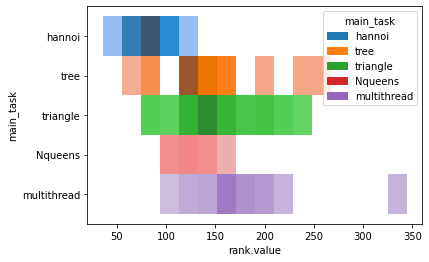

In [39]:
sns.histplot(
    data=df_grouped,
    x="rank.value",
    hue='main_task',
    y='main_task'
)

In [40]:
# LOAD MACHINE DATA - METHOD PREDICTION
df_selection = df_comparison[df_comparison["input_machine_filestem"] == machine_target]
machine_data = np.load(
    os.path.join(
        MACHINE_FOLDER, TARGET_ATT["data_folder"], f"{machine_target}.npy")
)
machine_metadata = all_machine_metadata[machine_target]
# LOAD HUMAN DATA - GROUND TRUTH
# get corresponding human data
picked_record = df_selection.iloc[0]
target_human_code = picked_record["input_human_filestem"]
human_data = np.load(
    os.path.join(
        HUMAN_FOLDER, TARGET_ATT["ground_truth_folder"], f"{target_human_code}.npy")
)
human_metadata = load_json_file(
    os.path.join(
        HUMAN_FOLDER, 'metadata', f"{target_human_code}.json")
)
print(f"Human: {target_human_code}.npy")

from attwizard.aligner import replace_char_in_tokens
tokens = replace_char_in_tokens(
    machine_metadata["tokens_prompt"],
    mapping={"Ġ": ' ', "Ċ": '\n'})
tokenization = get_tokens_with_col_and_line(
    text=machine_metadata["text_prompt"],
    tokens=tokens
)
# increase the line of one
for i in range(len(tokenization)):
    tokenization[i]["l"] += 1
tokenization = [
    {**t, "err": df_selection[df_selection[f"{col_short}.token_index"] == t['i']][f"{col_short}.value"].values[0]}
    for t in tokenization
]
tokenization[:1]

Human: 08147e.npy


[{'s': 0, 'i': 0, 'c': 0, 'l': 1, 't': '#', 'err': 366}]

For which token it is more difficult to make the prediction?
Average error: 150.66409266409266


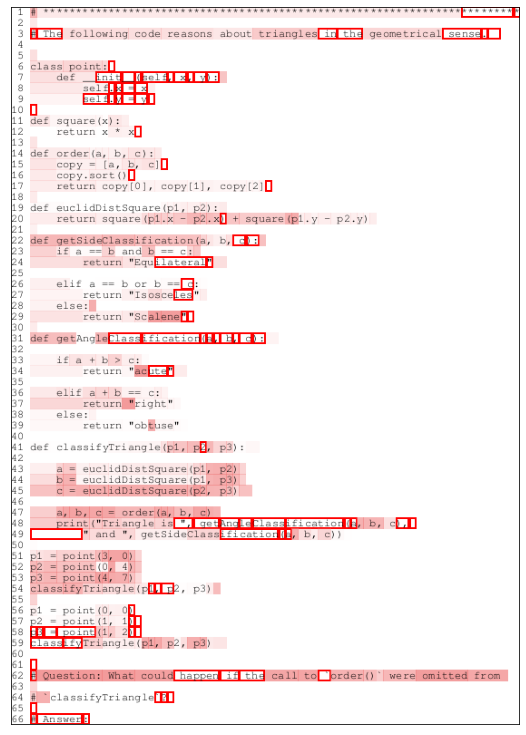

In [41]:
# inspect which token makes most of the error 
from codeattention.source_code import SourceCode

error_weights = [
    t['err'] if t['err'] != -1 else 0
    for t in tokenization
]

viz_sc = SourceCode(tokenization)
print("For which token it is more difficult to make the prediction?")
avg_error = np.mean(error_weights)
print(f'Average error: {avg_error}')
fig, ax = viz_sc.show_with_weights(
    weights=error_weights,
    squares=[
        1 if t['err'] == -1 else 0
        for t in tokenization
    ],
    show_line_numbers=True,
    char_height=12,
    named_color='lightcoral'
)

In [42]:
LINE_LEVEL = False

In [31]:
LINE_LEVEL =  True

In [43]:
human_metadata.keys()

dict_keys(['user_name', 'task_number', 'source_code', 'tokenization', 'raw_text'])

Dropdown(description='Token', index=421, layout=Layout(width='auto'), options=({'s': 0, 'i': 0, 'c': 0, 'l': 1…

518
top_machine_token_index:  421
Next token prediction by machine is on the yellow line.
518
Next token prediction by human is on the green line.
TOKEN:  7


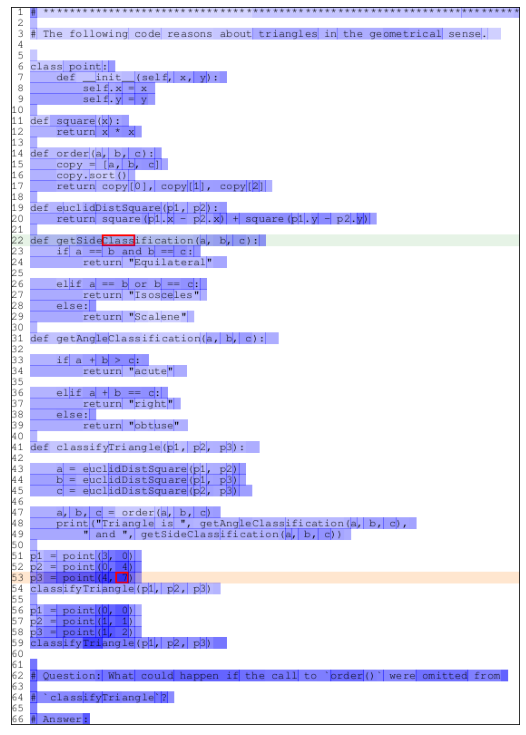

Ground truth


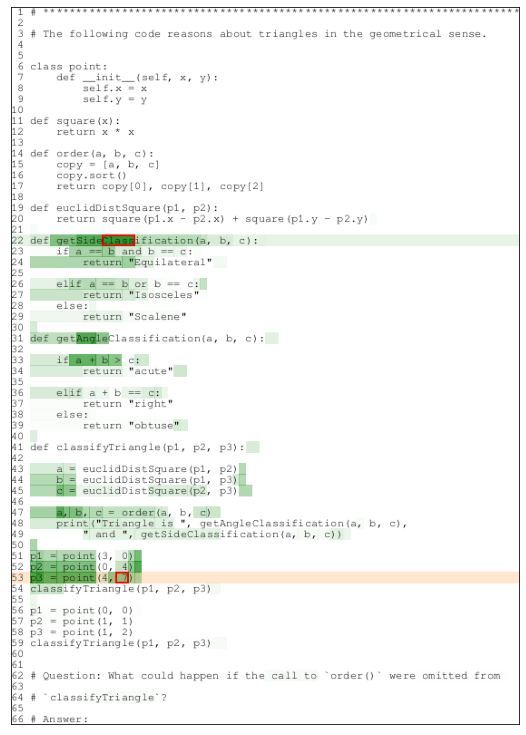

In [44]:
from ipywidgets import widgets
from IPython.display import display, clear_output
from typing import List
from codeattention.source_code import SourceCode
from attwizard.analysis_pass.transformation_functions import convert_to_token_to_lines

# crate a dropdown with the widgets of the notebook
def create_dropdown(dropdown_name: str, dropdown_options: List[str]):
    """Create a dropdown widget."""
    dropdown = widgets.Dropdown(
        options=dropdown_options,
        value=dropdown_options[0],
        description=dropdown_name,
        disabled=False,
        layout=widgets.Layout(width='auto')
    )
    return dropdown

dropdown = create_dropdown('Token', tokenization)

def on_dropdown_change(change):
    global tokenization
    global machine_data
    global human_data
    global machine_metadata
    global human_metadata
    global LINE_LEVEL
    record = change.new
    token_index = record['i']
    codeatt_tokenization = tokenization
    m = machine_data
    h = human_data

    squares = np.zeros(len(codeatt_tokenization))
    squares[token_index] = 1
    clear_output()
    display(dropdown)
    

    lines = []

    if LINE_LEVEL:
        n_lines = max([t['l'] for t in codeatt_tokenization])
        max_prediction_targets = n_lines
        h, m = convert_to_token_to_lines(
            h, m, 
            human_metadata, machine_metadata,
            special_char_mapping={"Ġ": ' ', "Ċ": '\n'})
        # convert to numpy
        h = h.numpy()
        m = m.numpy()
        line_content = human_metadata['raw_text']
        lines_content = line_content.split('\n')
        codeatt_tokenization = [
            {'c': 0, 'l': i + 1, 'i': i, 't': lines_content[i]}
            for i in range(len(lines_content))
        ]
    else:
        max_prediction_targets = len(codeatt_tokenization)
    
    viz_sc = SourceCode(codeatt_tokenization)
    
    # MACHINE
    next_token_prediction_machine = m[token_index, :max_prediction_targets]
    print(len(next_token_prediction_machine))

    next_token_prediction_machine[np.isnan(next_token_prediction_machine)] = 0.00000001
    #print(next_token_prediction_machine)
    top_machine_token_index = np.argsort(next_token_prediction_machine)[::-1][0]
    print('top_machine_token_index: ', top_machine_token_index)
    top_machine_line = [t['l'] for t in codeatt_tokenization if t['i'] == top_machine_token_index][0]
    print("Next token prediction by machine is on the yellow line.")
    squares[top_machine_token_index] = 1
    lines.append({
        "line": top_machine_line,
        "type": "background",
        "color": 'yellow'
    })
    # HUMAN
    next_token_prediction_human = h[token_index, :max_prediction_targets]
    print(len(next_token_prediction_human))
    next_token_prediction_human[np.isnan(next_token_prediction_human)] = 0
    if np.sum(next_token_prediction_human) > 0:
        top_human_token_index = np.argsort(next_token_prediction_human)[::-1][0]
        top_human_line = [t['l'] for t in codeatt_tokenization if t['i'] == top_human_token_index][0]
        print("Next token prediction by human is on the green line.")
        squares[top_human_token_index] = 1 
        lines.append({
            "line": top_human_line,
            "type": "background",
            "color": "green"
        })
    else:
        print("Human never passed by this token.")
    # MACHINE
    print('=' * 80)
    print(f"TOKEN: {record['t']}")
    print('=' * 80)
    lines.append({
        "line": record['l'],
        "type": "background",
        "color": "red"
    })
    base_lines = lines
    if LINE_LEVEL:
        max_value = np.max(next_token_prediction_machine)
        for i, w in enumerate(next_token_prediction_machine):
            lines = base_lines.copy()
            lines.append({
                "line": i + 1,
                "type": "background",
                "color": "blue",
                "alpha": w / (max_value * 1.25)
            })
    fig, ax = viz_sc.show_with_weights(
        weights=next_token_prediction_machine,
        show_line_numbers=True,
        char_height=12,
        squares=squares,
        named_color='blue',
        lines_highlight=lines
    )
    plt.show()
    # HUMAN - GROUND TRUTH
    print("Ground truth")
    if np.sum(next_token_prediction_human) > 0:
        if LINE_LEVEL:
            lines = base_lines.copy()
            max_value = np.max(next_token_prediction_machine)
            for i, w in enumerate(next_token_prediction_machine):
                lines.append({
                    "line": i + 1,
                    "type": "background",
                    "color": "green",
                    "alpha": w / (max_value * 1.25)
                })
        fig, ax = viz_sc.show_with_weights(
            weights=next_token_prediction_human,
            show_line_numbers=True,
            char_height=12,
            squares=squares,
            lines_highlight=lines
        )
        plt.show()
    else:
        print("Human never passed by this token.")

# add the listener to the dropdown
dropdown.observe(on_dropdown_change, names='value')
display(dropdown)

# Focus on two examples

In [91]:
from attwizard.attention_postprocessing import compute_followup_attention
from attwizard.attention_postprocessing import compute_naive_max_aggregation
from attwizard.attention_postprocessing import compute_naive_mean_aggregation
from attwizard.attention_postprocessing import compute_mean_of_followers
from attwizard.attention_postprocessing import compute_attention_flow_from_tensor
from attwizard.attention_postprocessing import compute_attention_rollout_from_tensor
from attwizard.attention_postprocessing import compute_transitive_attention
from attwizard.attention_postprocessing import generate_uniform_attention

# Machine derived attention
unif_att = generate_uniform_attention(machine_data)
followup_att = compute_followup_attention(machine_data)
half_followup_att = compute_followup_attention(
    machine_data[machine_data.shape[0] // 2:, :, :, :])
max_att = compute_naive_max_aggregation(machine_data)
mean_att = compute_naive_mean_aggregation(machine_data)

100%|██████████| 33/33 [00:27<00:00,  1.21it/s]


Consecutive layer pairs:  torch.Size([33, 696, 696])


100%|██████████| 16/16 [00:13<00:00,  1.19it/s]

Consecutive layer pairs:  torch.Size([16, 696, 696])


In [130]:
machine_data_no_first_token = machine_data
machine_data_no_first_token[:, :, 0, :] = 0
machine_data_no_first_token[:, :, :, 0] = 0
followup_no_null_att = compute_followup_attention(machine_data_no_first_token)

100%|██████████| 33/33 [00:26<00:00,  1.23it/s]

Consecutive layer pairs:  torch.Size([33, 696, 696])


In [166]:
# create baseline where we recommend the tokens with the same contnet of the current token
size = len(model_tokenization)
copy_cat_att = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        if model_tokenization[i]["t"] == model_tokenization[j]["t"]:
            copy_cat_att[i][j] = 1

# Compare Followup Ground-Truth with Derivation Strategies

In [167]:
from attwizard.analysis_pass.comparison_functions import mse_line_by_line
from attwizard.analysis_pass.comparison_functions import rank 
from attwizard.analysis_pass.transformation_functions import keep_only_tokens_seen_by_model
from attwizard.analysis_pass.transformation_functions import normalize_both_matrices_by_line 
from attwizard.analysis_pass.data_helper import explode_column_with_list_of_tuples
# attentions to analyze
attention_infos = [
    {
        "name": "uniform",
        "data": unif_att,
    },
    {
        "name": 'followup',
        "data": followup_att
    },
    {
        "name": 'max',
        "data": max_att
    },
    {
        "name": 'mean',
        "data": mean_att
    },
    {
        "name": 'half_followup',
        "data": half_followup_att
    },
    {
        "name": 'followup_no_null',
        "data": followup_no_null_att 
    },
    {
        "name": 'copy_cat',
        "data": copy_cat_att
    },
]
# comparisons
comparison_infos = [
    {
        "name": "mse",
        "func": mse_line_by_line,
        "col_to_split": "mse_list"
    },
    {
        "name": "rank",
        "func": rank,
        "col_to_split": "rank_list"
    }
]

In [168]:
# enrich the attention info with the comparison results
# each comparison will produce a token of losses with one element for each 
# token in the prompt
from typing import List, Dict, Any

def compute_losses(
        attention_infos: List[Dict[str, Any]],
        comparison_infos: List[Dict[str, Any]],
        human_data: np.ndarray):
    """Compute the losses for each attention_info.
    
    It returns a new attention_infos with a new field `loss_token_token`
    which has a key for each loss (e.g. `mse`, `rank`) and each of them holds
    a vector of length the number of tokens in the prompt.
    """
    new_attention_infos = []
    h = human_data
    for attention_info in attention_infos:
        new_attention_info = attention_info
        losses_dict = {}
        for comparison_info in comparison_infos:
            m = attention_info["data"]
            # convert to numpy if not already
            if not isinstance(m, np.ndarray):    
                m = m.numpy()
            if not isinstance(h, np.ndarray):
                h = h.numpy()
            # print dimensions
            h, m = keep_only_tokens_seen_by_model(h, m, human_metadata, machine_metadata)
            h = h[:m.shape[0], :m.shape[1]]
            h, m = normalize_both_matrices_by_line(h, m, human_metadata, machine_metadata)
            comparison_records = comparison_info['func'](h, m)
            df_distance_err = pd.DataFrame.from_records(comparison_records)
            col_short = comparison_info["col_to_split"]
            import ast
            for i, element_name in enumerate([comparison_info["name"], "matrix_line"]):
                df_distance_err[f"{col_short}.{element_name}"] = df_distance_err.apply(
                    lambda row: ast.literal_eval(str(row[col_short]))[i],
                    axis=1
                )
            col_metric = f"{comparison_info['col_to_split']}.{comparison_info['name']}"
            col_matrix_line = f"{comparison_info['col_to_split']}.matrix_line"
            losses_dict[comparison_info["name"]] = list(
                df_distance_err[col_metric])
            
        new_attention_info["loss_token_token"] = losses_dict
        new_attention_infos.append(new_attention_info)
    return new_attention_infos

attention_infos = compute_losses(
    attention_infos, comparison_infos, human_data)


In [169]:
for a in attention_infos:
    print(a["name"])
len(attention_infos)

uniform
followup
max
mean
half_followup
followup_no_null
copy_cat


7

In [141]:
len(attention_infos[0]["loss_token_token"]['rank'])

597

In [94]:
import statistics

def plot_attention(
        attention_infos, comparison_infos, 
        human_data, human_metadata, 
        machine_data, machine_metadata, 
        human_vector, other_human_vector,
        granularity: str = "tokens",
        max_char: int = 40, 
        keep_every_nth_label: int = 5, 
        skip_at_beginning: int = 0,):
    """Show the error of multiple processing techniques on the same data
    
    granularity can be "tokens" or "lines"
    """
    h = human_data

    for i_comp, comparison_info in enumerate(comparison_infos):
            
        fig, axes = plt.subplots(
            len(attention_infos) + 2, 1,
            figsize=(18, 10),
            sharex=True
        )
        max_value = 0

        for i_att, attention_info in enumerate(attention_infos):
            print("Attention: ", attention_info["name"])
            m = attention_info["data"]
            # convert to numpy if not already
            if not isinstance(m, np.ndarray):    
                m = m.numpy()
            if not isinstance(h, np.ndarray):
                h = h.numpy()
            # print dimensions
            print("Machine shape: ", m.shape, " Human shape: ", h.shape)
            h, m = keep_only_tokens_seen_by_model(h, m, human_metadata, machine_metadata)
            print("after keep_only_tokens_seen_by_model: Machine shape: ", m.shape, " Human shape: ", h.shape)
            h = h[:m.shape[0], :m.shape[1]]
            h, m = normalize_both_matrices_by_line(h, m, human_metadata, machine_metadata)
            print("after reshape: Machine shape: ", m.shape, " Human shape: ", h.shape)
            vec = human_vector[:m.shape[0]]
            other_vec = other_human_vector[:m.shape[0]]
            comparison_records = comparison_info['func'](h, m)
            df_distance_err = pd.DataFrame.from_records(comparison_records)

            df_distance_err["time_spent_here"] = vec
            df_distance_err["time_spent_here_other_human"] = other_vec
            
            col_short = comparison_info["col_to_split"]
            import ast
            for i, element_name in enumerate([comparison_info["name"], "matrix_line"]):
                df_distance_err[f"{col_short}.{element_name}"] = df_distance_err.apply(
                    lambda row: ast.literal_eval(str(row[col_short]))[i],
                    axis=1
                )
            col_metric = f"{comparison_info['col_to_split']}.{comparison_info['name']}"
            col_matrix_line = f"{comparison_info['col_to_split']}.matrix_line"
            max_value = max(max_value, df_distance_err[
                col_metric
            ].max())

            if granularity == "tokens":
                # augment with current token
                df_distance_err["token_content"] = df_distance_err.apply(
                    lambda row: machine_metadata["tokens_prompt"][int(row[col_matrix_line])], 
                    axis=1)
                def get_line_number(all_tokens, target_token_index):
                    """Return the line of the target token, given its index."""
                    # count how many new line characters we have seen before the target token
                    all_tokens_before = all_tokens[:target_token_index]
                    text = "".join(all_tokens_before)
                    return text.count("Ċ")
                    
                df_distance_err["line"] = df_distance_err.apply(
                    lambda row: get_line_number(machine_metadata["tokens_prompt"], row[col_matrix_line]),
                    axis=1
                )
                df_distance_err["line_content"] = df_distance_err.apply(
                    lambda row: machine_metadata["text_prompt"].split("\n")[row["line"]],
                    axis=1
                )
           
                ticks_with_token_and_line = df_distance_err[["token_content", "line_content"]].values.tolist()
                ticks_with_token_and_line = [
                    f"{t[0]} ({t[1][:max_char]})" if len(t[1]) > max_char else f"{t[0]} ({t[1]})"
                    for t in ticks_with_token_and_line
                ]
                ticks_with_token_and_line = [
                    t if i % keep_every_nth_label == 0 else ""
                    for i, t in enumerate(ticks_with_token_and_line)
                ]
            #fig, axes = plt.subplots(1, 2, figsize=(15, 0.2 * len(df_mse)))
            ax_mse = axes[2 + i_att]
            ax_tot_time = axes[0]
            ax_other_human = axes[1]

            sns.barplot(
                data=df_distance_err,
                y=col_metric,
                x=col_matrix_line,
                ax=ax_mse,
                color='red'
            )
            # replace the x-axis
            ax_mse.set_xticks(
                ticks=np.arange(len(df_distance_err)),
                labels=ticks_with_token_and_line,
                rotation=90
            )
            ax_mse.set_title(f"Machine Attention {comparison_info['name']} ({attention_info['name']})")

            # HUMAN DATA / TARGET HUMAN

            sns.barplot(
                data=df_distance_err,
                y="time_spent_here",
                x=col_matrix_line,
                ax=ax_tot_time,
                color='green'
            )
            # replace the x-axis
            ax_tot_time.set_xticks(
                ticks=np.arange(len(df_distance_err)),
                labels=ticks_with_token_and_line,
                rotation=90
            )
            ax_tot_time.set_title("(HUMAN) Time Spent Here ")

            # HUMAN DATA / OTHER HUMAN

            sns.barplot(
                data=df_distance_err,
                y="time_spent_here_other_human",
                x=col_matrix_line,
                ax=ax_other_human,
                color='darkviolet'
            )
            # replace the x-axis
            ax_other_human.set_xticks(
                ticks=np.arange(len(df_distance_err)),
                labels=ticks_with_token_and_line,
                rotation=90
            )
            ax_other_human.set_title("(OTHER HUMAN) Time Spent Here ")

            ax_tot_time.axvline(x=skip_at_beginning, color='black', linestyle='--')
            print(f"Eliminating {skip_at_beginning} data from the beginning.")    
            print(f"Average {comparison_info['name']}: {df_distance_err[col_metric].iloc[skip_at_beginning:].mean()}")
            print(f"Harmonic {comparison_info['name']}: {statistics.harmonic_mean(df_distance_err[col_metric].iloc[skip_at_beginning:])}")
            print("=" * 80)

        plt.tight_layout()   
        # set the same y lim max value for all plots
        for i_att, _ in enumerate(attention_infos):
            axes[2 + i_att].set_ylim(0, max_value)
        plt.plot()


Attention:  uniform
Machine shape:  (696, 696)  Human shape:  (599, 599)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 597)  Human shape:  (597, 597)
after reshape: Machine shape:  (597, 597)  Human shape:  (597, 597)
Eliminating 0 data from the beginning.
Average mse: 3.068581904448925e-05
Harmonic mse: 1.2996075383232463e-05
Attention:  followup
Machine shape:  (696, 696)  Human shape:  (597, 597)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 597)  Human shape:  (597, 597)
after reshape: Machine shape:  (597, 597)  Human shape:  (597, 597)
Eliminating 0 data from the beginning.
Average mse: 1.2957512032830821e-05
Harmonic mse: 7.437915697555762e-06
Attention:  max
Machine shape:  (696, 696)  Human shape:  (597, 597)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 597)  Human shape:  (597, 597)
after reshape: Machine shape:  (597, 597)  Human shape:  (597, 597)
Eliminating 0 data from the beginning.
Average mse: 5.309984645393635e-05
Harmonic ms

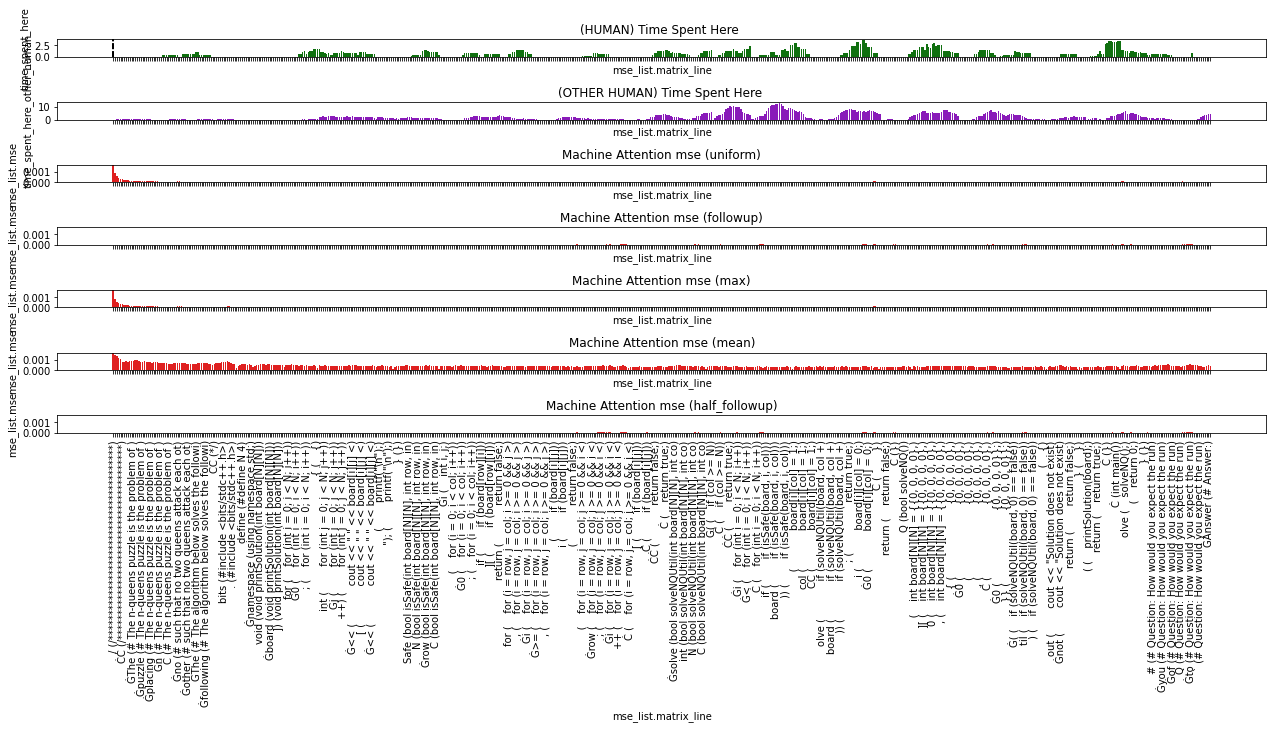

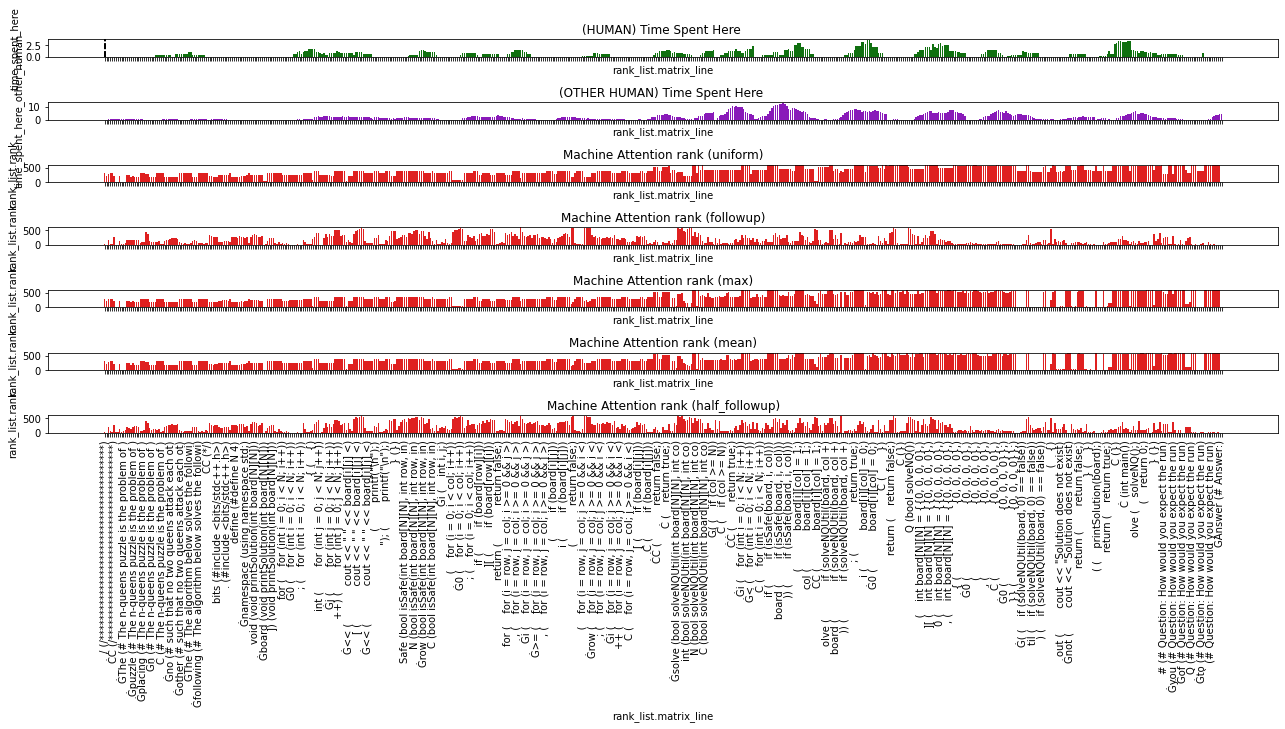

In [95]:

plot_attention(
    attention_infos=attention_infos,
    comparison_infos=comparison_infos,
    human_data=human_data,
    human_metadata=human_metadata,
    machine_data=machine_data,
    machine_metadata=machine_metadata,
    human_vector=human_vector,
    other_human_vector=other_human_vector,
)
    


Attention:  self
Machine shape:  (599, 599)  Human shape:  (599, 599)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 597)  Human shape:  (597, 597)
after reshape: Machine shape:  (597, 597)  Human shape:  (597, 597)
Eliminating 0 data from the beginning.
Average mse: 0.0
Harmonic mse: 0
Attention:  other
Machine shape:  (599, 599)  Human shape:  (597, 597)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 597)  Human shape:  (597, 597)
after reshape: Machine shape:  (597, 597)  Human shape:  (597, 597)
Eliminating 0 data from the beginning.
Average mse: 1.8536659247906194e-05
Harmonic mse: 0
Attention:  self
Machine shape:  (599, 599)  Human shape:  (597, 597)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 597)  Human shape:  (597, 597)
after reshape: Machine shape:  (597, 597)  Human shape:  (597, 597)
Eliminating 0 data from the beginning.
Average rank: 1.0
Harmonic rank: 1.0
Attention:  other
Machine shape:  (599, 599)  Human shape:  (597, 597)
af

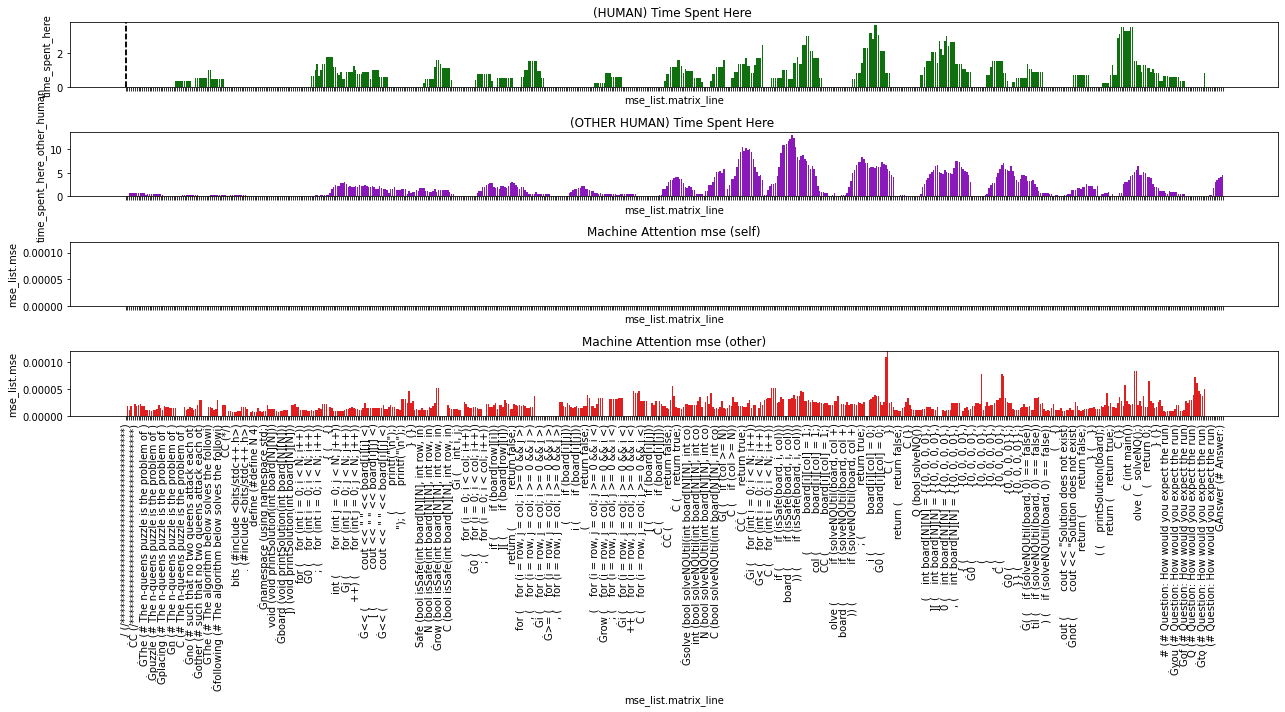

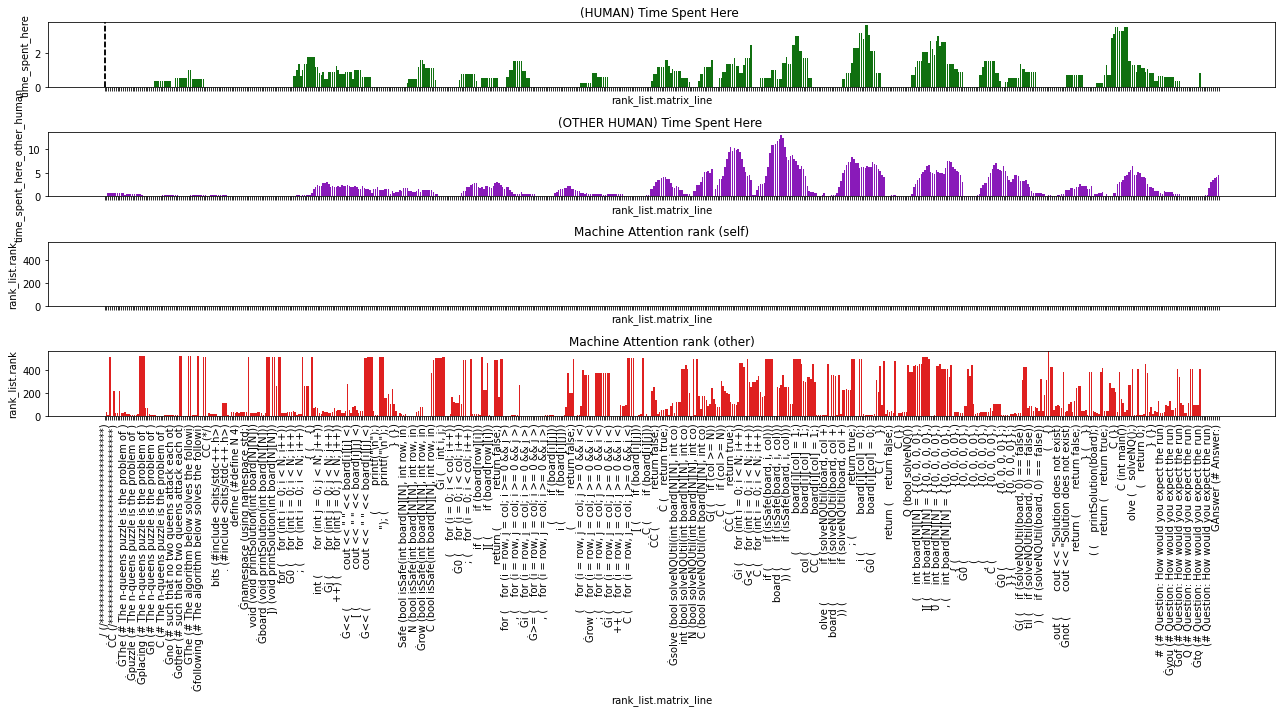

In [96]:
plot_attention(
    attention_infos=[
        {
            "name": "self", 
            "data": human_data
        },
        {
            "name": "other",
            "data": other_human_data
        }
    ],
    comparison_infos=comparison_infos,
    human_data=human_data,
    human_metadata=human_metadata,
    machine_data=human_data,  # note here
    machine_metadata=machine_metadata,
    human_vector=human_vector,
    other_human_vector=other_human_vector,
)

# Zoom

In [170]:
len(attention_infos)

7

In [223]:
from tqdm import tqdm

START_RANGE = 0
END_RANGE = len(model_tokenization)

LOSS_NAME = "rank"

def compare_attention_losses(
        attention_infos: List[Dict[str, Any]],
        start_range: int,
        end_range: int,
        target_loss: str = 'rank',
        human_vector: List[float] = None,):
    """Plot the losses as histograms one after the other."""
    N_ATTENTIONS = len(attention_infos)
    shift = 1 if human_vector is not None else 0
    fig, axes = plt.subplots(N_ATTENTIONS + shift, 1, 
        sharex=True,
        figsize=(20, 1.5 * N_ATTENTIONS))
    
    if human_vector is not None:
        ax_human = axes[0]
        ax_human.bar(
            x=range(len(human_vector)),
            height=human_vector,
            color='green'
        )
        start_range = max(0, start_range)
        end_range = min(len(human_vector), end_range)
        ax_human.set_xlim(start_range, end_range)

    for i, attention_info in tqdm(enumerate(attention_infos)):
        i = i + shift
        #print(f"Plotting attention {i}: {attention_info['name']}")
        c_ax = axes[i]
        df = pd.DataFrame.from_records(model_tokenization)
        ranks = attention_info["loss_token_token"][target_loss]
        # cut the df to the number of ranks
        df = df.iloc[:len(ranks)]
        df[target_loss] = ranks
        # select the range
        if end_range > len(df):
            df = df.iloc[start_range:]
            #print("showing until the end")
        else:
            df = df.iloc[start_range:end_range]
        # compute the average
        mean_loss = df[target_loss].mean()
        # compute harmonic mean
        harmonic_mean_loss = statistics.harmonic_mean(df[target_loss])
        # print(f"The average {target_loss} is {mean_loss} (range: {start_range}-{end_range})")
        sns.barplot(
            data=df,
            y=target_loss,
            x="i",
            ax=c_ax,
            color='red'
        )
        # replace the x-axis
        c_ax.set_xticks(
            ticks=np.arange(len(df)),
            labels=df["t"],
            rotation=90
        )
        c_ax.set_title(f"{attention_info['name']} ({target_loss}: avg={mean_loss:.2f}, harm={harmonic_mean_loss:.2f}, range: {start_range}-{end_range})")
    plt.tight_layout()
    return fig, axes


7it [00:11,  1.60s/it]


(<Figure size 1440x756 with 8 Axes>,
 array([<AxesSubplot:>,
        <AxesSubplot:title={'center':'uniform (rank: avg=384.64, harm=155.28, range: 0-599)'}, xlabel='i', ylabel='rank'>,
        <AxesSubplot:title={'center':'followup (rank: avg=179.66, harm=29.78, range: 0-599)'}, xlabel='i', ylabel='rank'>,
        <AxesSubplot:title={'center':'max (rank: avg=355.18, harm=78.21, range: 0-599)'}, xlabel='i', ylabel='rank'>,
        <AxesSubplot:title={'center':'mean (rank: avg=353.83, harm=84.10, range: 0-599)'}, xlabel='i', ylabel='rank'>,
        <AxesSubplot:title={'center':'half_followup (rank: avg=212.63, harm=34.46, range: 0-599)'}, xlabel='i', ylabel='rank'>,
        <AxesSubplot:title={'center':'followup_no_null (rank: avg=179.37, harm=28.42, range: 0-599)'}, xlabel='i', ylabel='rank'>,
        <AxesSubplot:title={'center':'copy_cat (rank: avg=271.83, harm=33.92, range: 0-599)'}, xlabel='i', ylabel='rank'>],
       dtype=object))

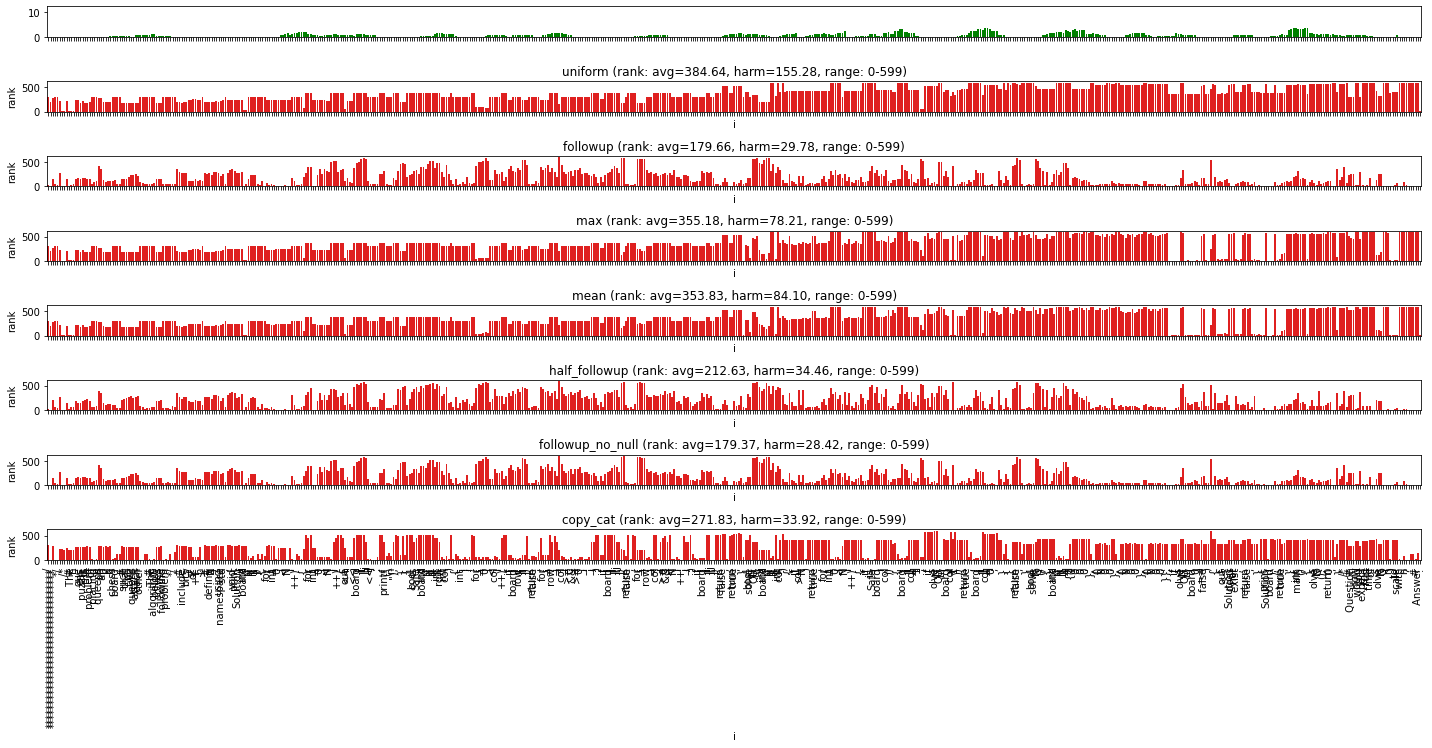

In [203]:

compare_attention_losses(
    attention_infos=attention_infos,
    start_range=START_RANGE,
    end_range=END_RANGE,
    target_loss=LOSS_NAME,
    human_vector=human_vector,
)

In [228]:
def compare_two_approaches(
        approach_a: str,
        approach_b: str,
        attention_infos: List[Dict[str, Any]],
        model_tokenization: List[Dict[str, Any]],
        human_vector = None,
        human_data = None,
        loss_name: str = "rank",
        top_n: int = 3,
        window_size: int = 40,):
    """Plot cases with large difference between the two approaches."""
    # inspect those cases where the copy cat and the followup have the largest difference in loss
    att_info_A = [
        a for a in attention_infos if a["name"] == approach_a][0]
    att_info_B = [
        a for a in attention_infos if a["name"] == approach_b][0]
    two_attention_infos = [
        a for a in attention_infos
        if a["name"] == approach_a or a["name"] == approach_b
    ]
    difference = np.array(att_info_A["loss_token_token"][loss_name]) - np.array(att_info_B["loss_token_token"][loss_name])
    # the followup is BEST
    for approach_name, diff in zip([approach_a, approach_b], [difference, -difference]):
        print("=" * 80)
        print(f"The top {top_n} {approach_name} cases are:")
        indices_followup_best = np.argsort(diff)[:top_n]
        for i in indices_followup_best:
            print(f"{i}: {model_tokenization[i]}")
            fig, axes = compare_attention_losses(
                attention_infos=two_attention_infos,
                start_range=max(0, i - window_size // 2),
                end_range=i + window_size // 2,
                target_loss=loss_name,
                human_vector=human_vector,
            )
            for ax in axes:
                ax.axvline(x=window_size // 2, color='black', linestyle='--')
            plt.show()
            # show where these tokens were pointing to
            fig, ax = plt.subplots(1, 1, figsize=(20, 5))
            for recom_vec, name in zip(
                    [att_info_A["data"][i], att_info_B["data"][i], human_data[i]],
                    [att_info_A["name"], att_info_B["name"], "human"]):
                # normalize vector
                if recom_vec.max() > 0:
                    recom_vec = recom_vec / recom_vec.max()
                ax.bar(
                    x=range(len(recom_vec)),
                    height=recom_vec,
                    label=name,
                )
            ax.legend()
            # create red vertical line at i
            ax.axvline(x=i, color='red', linestyle='--') 
            ax.set_xticks(
                ticks=np.arange(len(model_tokenization)),
                labels=[t['t'] for t in model_tokenization],
                rotation=90
            )
            ax.set_title("Recommendation vectors")
            plt.show()



In [ ]:


compare_two_approaches(
    approach_a="followup",
    approach_b="copy_cat",
    attention_infos=attention_infos,
    model_tokenization=model_tokenization,
    human_vector=human_vector,
    human_data=human_data,
    top_n=1
)

The top 3 followup cases are:
0: {'s': 0, 'i': 0, 'c': 0, 'l': 0, 't': '/'}


2it [00:00, 21.93it/s]
/tmp/ipykernel_1522236/2043801849.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


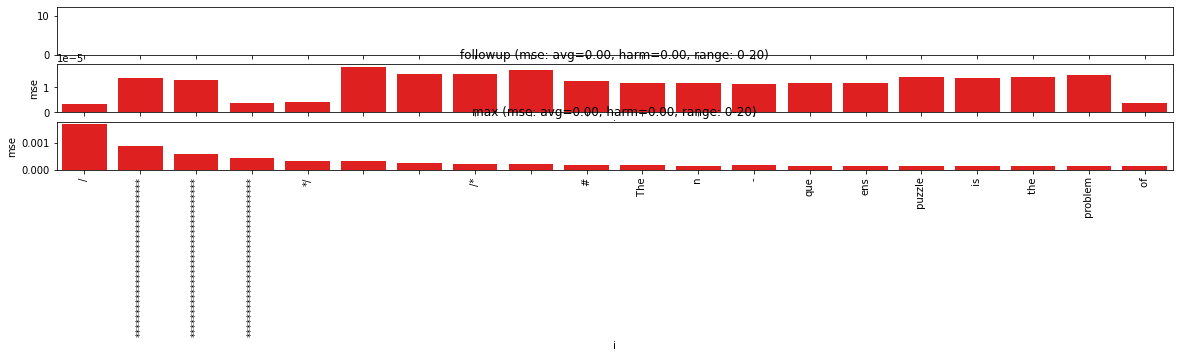

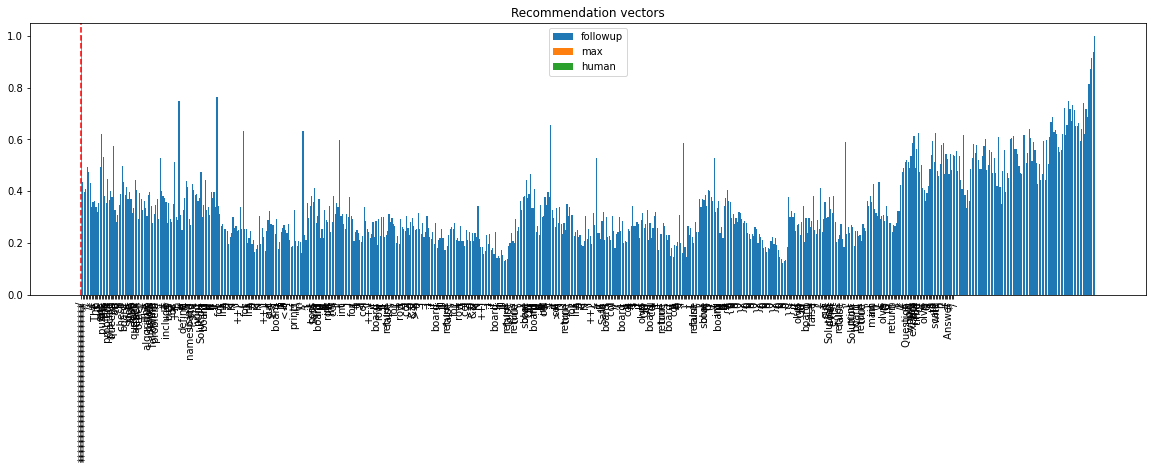

1: {'s': 1, 'i': 1, 'c': 1, 'l': 0, 't': '********************************'}


2it [00:00, 20.59it/s]
/tmp/ipykernel_1522236/2043801849.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


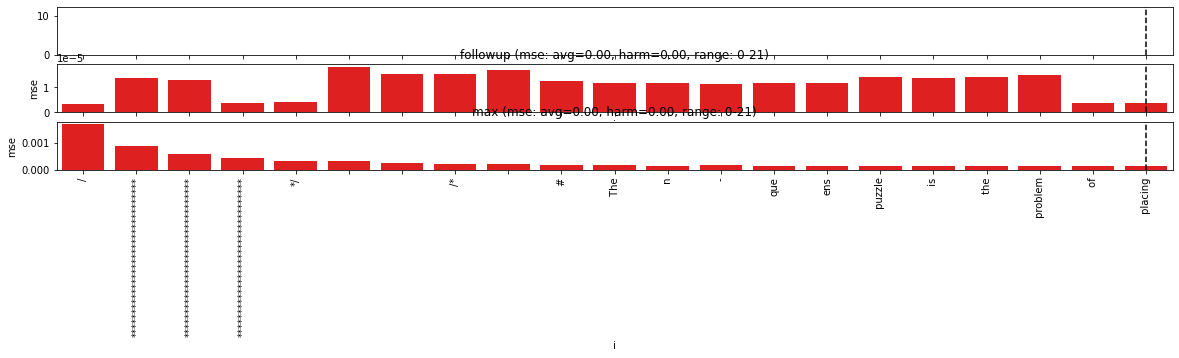

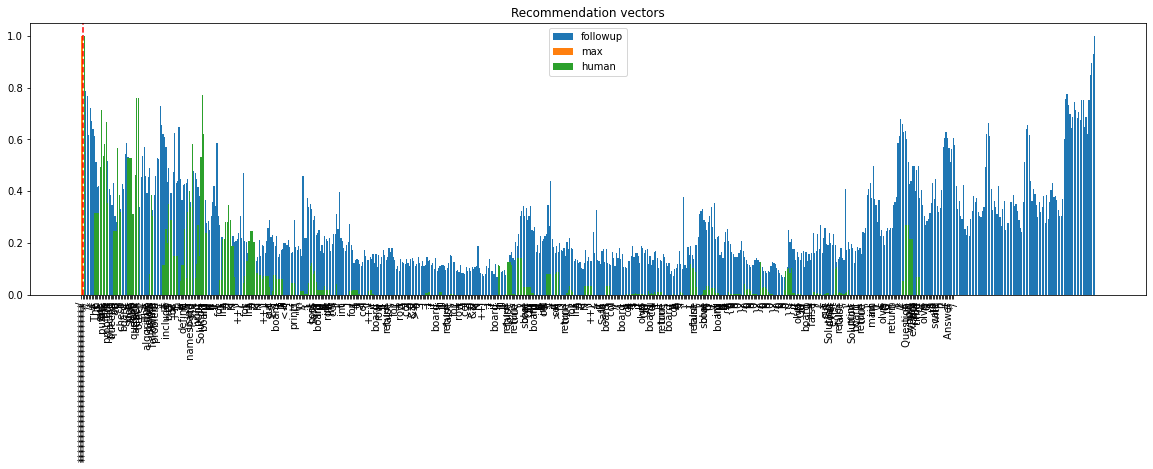

2: {'s': 33, 'i': 2, 'c': 33, 'l': 0, 't': '********************************'}


2it [00:00, 20.44it/s]
/tmp/ipykernel_1522236/2043801849.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


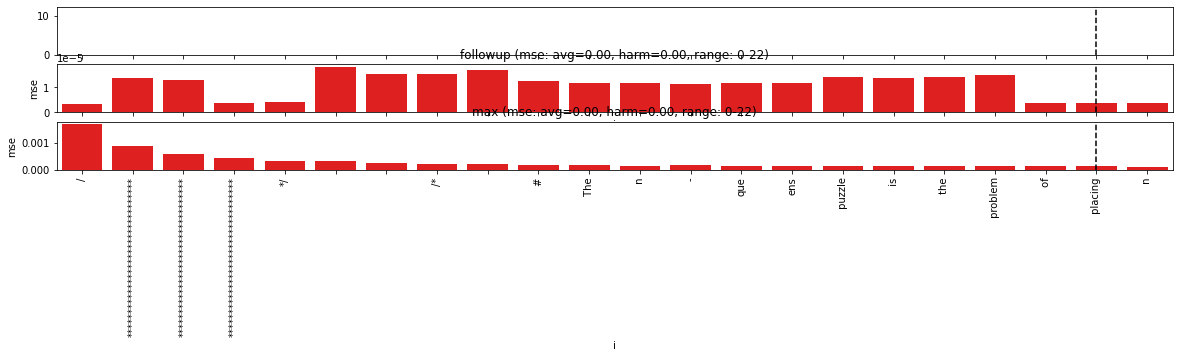

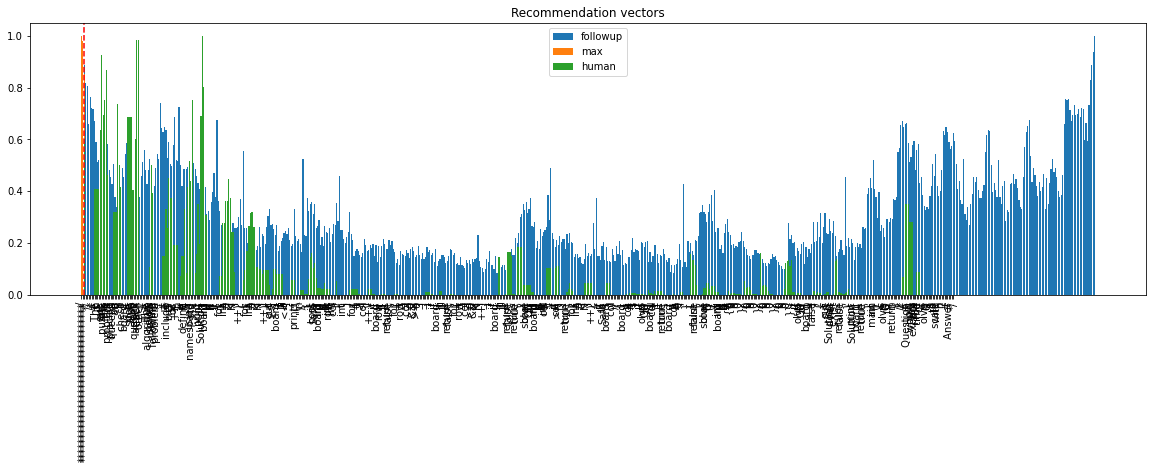

The top 3 max cases are:
586: {'s': 1706, 'i': 586, 'c': 64, 'l': 90, 't': ' scale'}


2it [00:00, 15.08it/s]


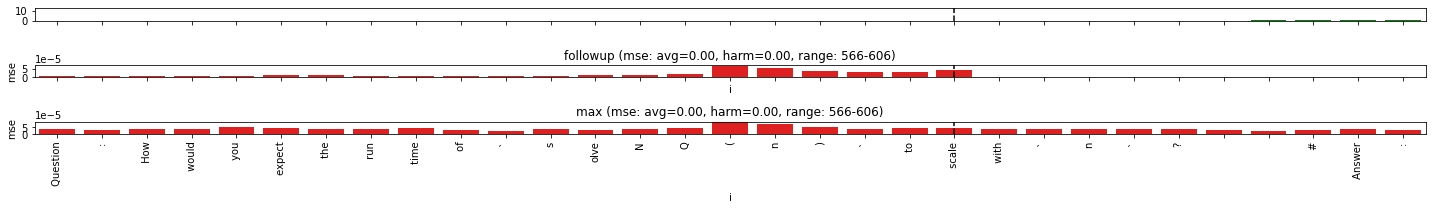

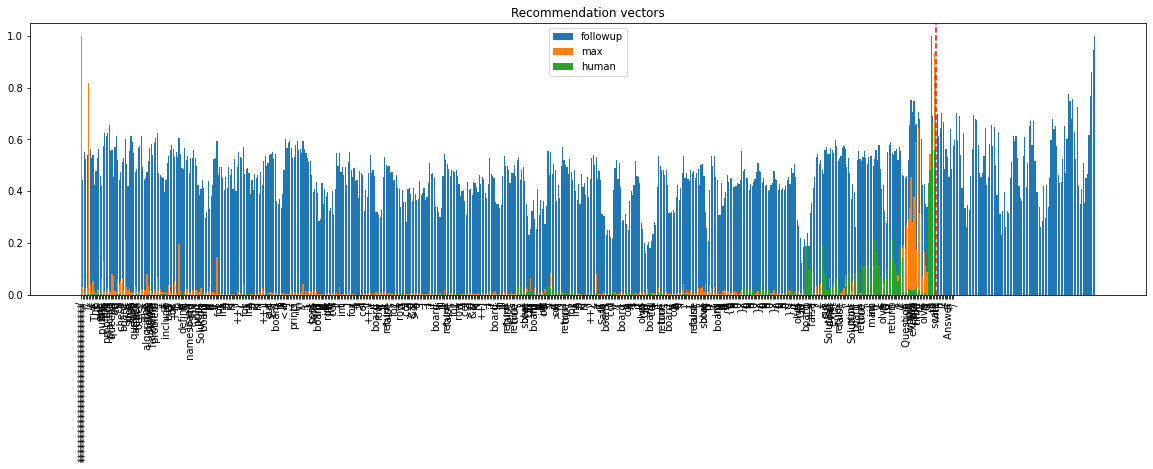

584: {'s': 1702, 'i': 584, 'c': 60, 'l': 90, 't': '`'}


2it [00:00, 14.08it/s]


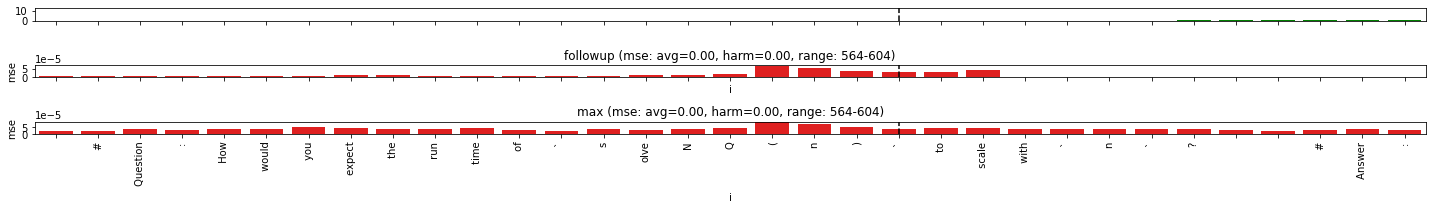

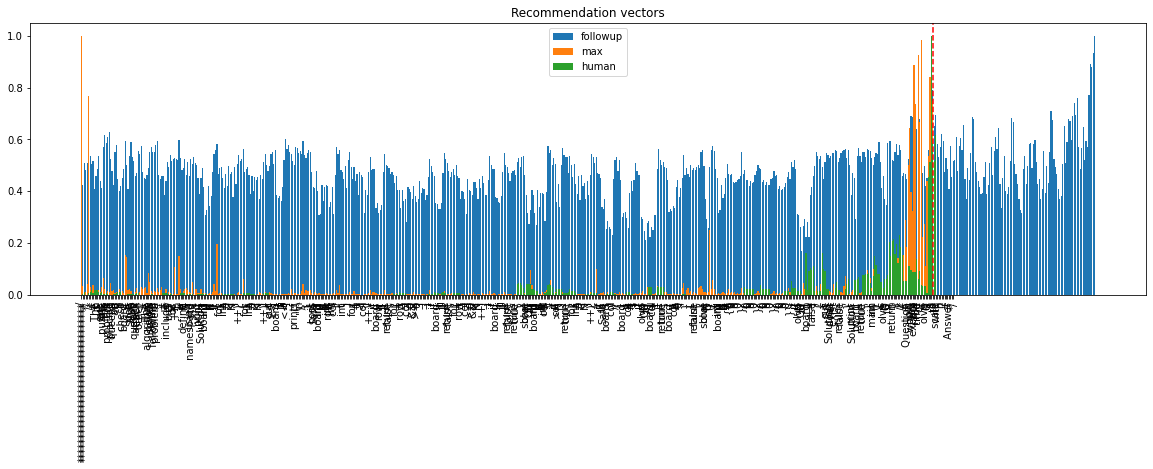

583: {'s': 1701, 'i': 583, 'c': 59, 'l': 90, 't': ')'}


2it [00:00, 13.86it/s]


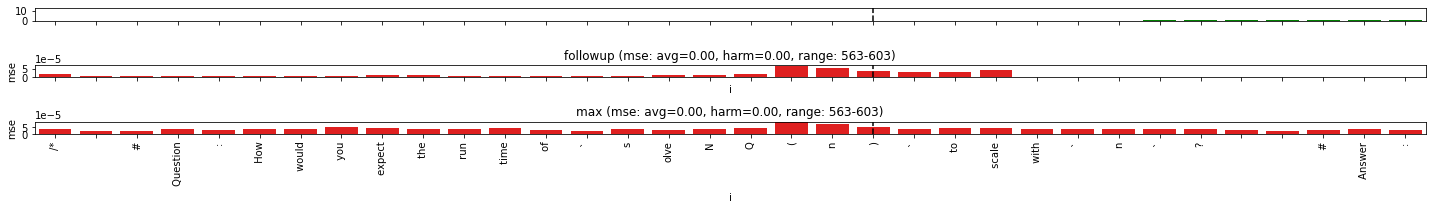

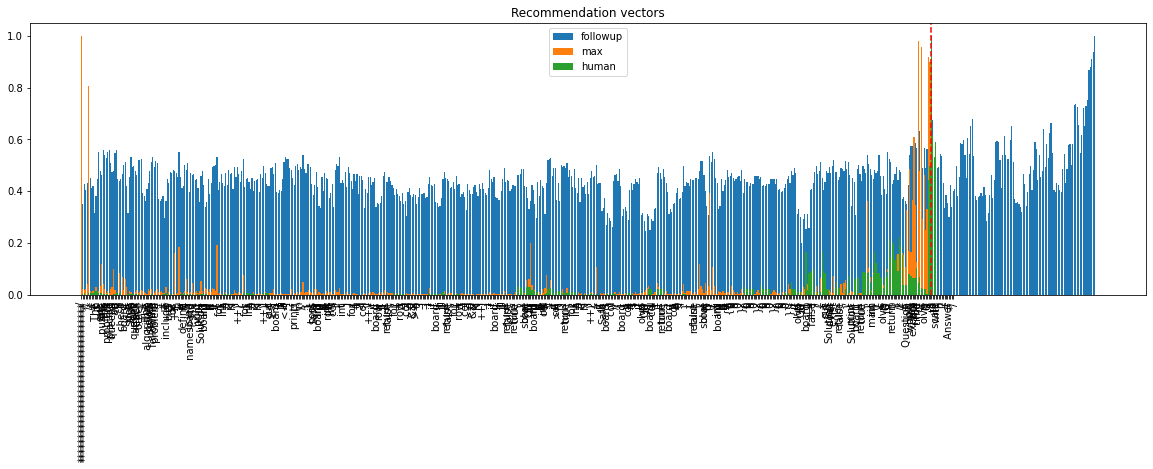

In [230]:
compare_two_approaches(
    approach_a="followup",
    approach_b="max",
    loss_name="mse",
    attention_infos=attention_infos,
    model_tokenization=model_tokenization,
    human_vector=human_vector,
    human_data=human_data,
    top_n=3
)

# Token-to-Line Comparison

In [98]:
from attwizard.shaper import aggregate_dim_tokens_to_line

def to_line_level_attention(att_matrix, tokenization):
    """Aggregate attention to line level.
    
    Tokenization is derived form the prompt given to the human, so it is shorter
    than the size of the attention matrix, which is derived from the full
    model prediction (namely including the newly generated tokens).
    """
    # convert human attention to line level
    line_indices = np.array(
        [t["l"] for t in tokenization]
    )
    # reduce the attention matrix to the size of the tokenization
    att_matrix = att_matrix[:len(tokenization), :len(tokenization)]
    line_matrix = aggregate_dim_tokens_to_line(
        att_tensor=att_matrix,
        line_indices=line_indices,
        dim=1)
    return line_matrix

human_data_line = to_line_level_attention(human_data, model_tokenization)
#human_vector_line = to_line_level_attention(
#    # add a dimension to the vector in position 0
#    human_vector.reshape(1, -1), model_tokenization)
#other_human_vector_line = to_line_level_attention(
#    # add a dimension to the vector in position 0
#    other_human_vector.reshape(1, -1), model_tokenization)


In [99]:
human_data.shape

(599, 599)

In [100]:
# attentions to analyze
attention_infos_line = [
    {
        "name": "uniform",
        "data": to_line_level_attention(unif_att, model_tokenization)
    },
    {
        "name": 'followup',
        "data": to_line_level_attention(followup_att, model_tokenization)
    },
    {
        "name": 'max',
        "data": to_line_level_attention(max_att, model_tokenization)
    },
    {
        "name": 'mean',
        "data": to_line_level_attention(mean_att, model_tokenization)
    },
    {
        "name": 'half_followup',
        "data": to_line_level_attention(half_followup_att, model_tokenization)
    },
]
# comparisons
comparison_infos_line = [
    {
        "name": "mse",
        "func": mse_line_by_line,
        "col_to_split": "mse_list"
    },
    {
        "name": "rank",
        "func": rank,
        "col_to_split": "rank_list"
    }
]

In [101]:
for e in attention_infos_line:
    print(e["name"], e["data"].shape)

uniform torch.Size([599, 82])
followup torch.Size([599, 82])
max torch.Size([599, 82])
mean torch.Size([599, 82])
half_followup torch.Size([599, 82])


In [102]:
human_data_line.shape

torch.Size([599, 82])

Attention:  uniform
Machine shape:  (599, 82)  Human shape:  (599, 82)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 82)  Human shape:  (597, 82)
after reshape: Machine shape:  (597, 82)  Human shape:  (597, 82)
Eliminating 0 data from the beginning.
Average mse: 0.0014503543026326549
Harmonic mse: 0.0007954167052385121
Attention:  followup
Machine shape:  (599, 82)  Human shape:  (597, 82)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 82)  Human shape:  (597, 82)
after reshape: Machine shape:  (597, 82)  Human shape:  (597, 82)
Eliminating 0 data from the beginning.
Average mse: 0.0004884774885175879
Harmonic mse: 0.00037588392330676446
Attention:  max
Machine shape:  (599, 82)  Human shape:  (597, 82)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 82)  Human shape:  (597, 82)
after reshape: Machine shape:  (597, 82)  Human shape:  (597, 82)
Eliminating 0 data from the beginning.
Average mse: 0.0018580446985594638
Harmonic mse: 0.00125712778979

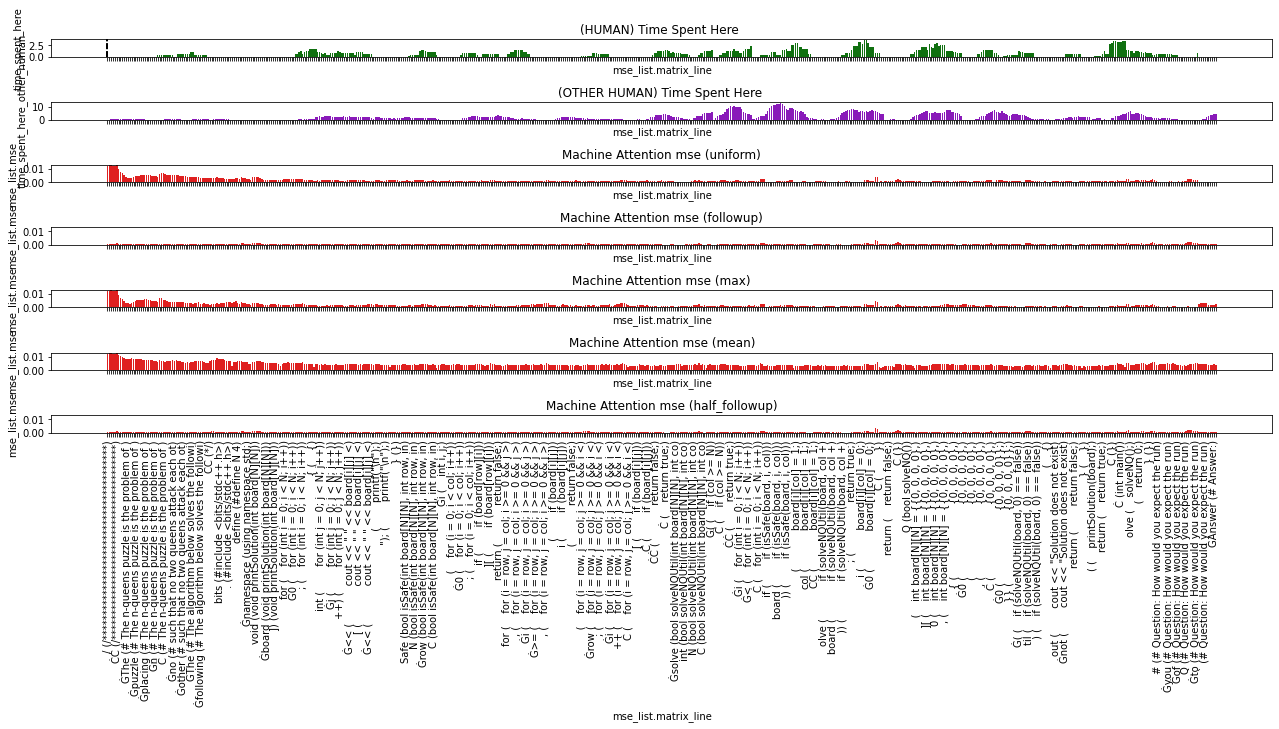

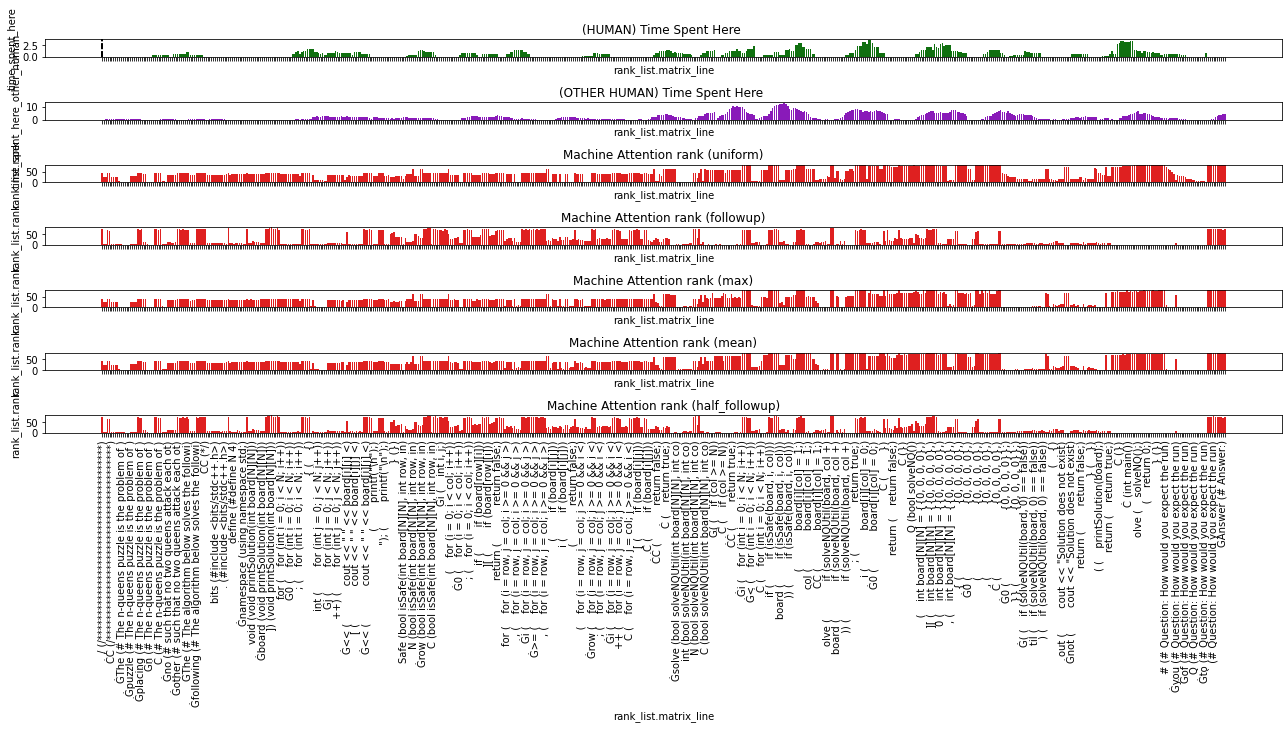

In [103]:
plot_attention(
    attention_infos=attention_infos_line,
    comparison_infos=comparison_infos_line,
    human_data=human_data_line,
    human_metadata=human_metadata,
    machine_data=machine_data,
    machine_metadata=machine_metadata,
    human_vector=human_vector,
    other_human_vector=other_human_vector,
)

Attention:  self
Machine shape:  (599, 82)  Human shape:  (599, 82)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 82)  Human shape:  (597, 82)
after reshape: Machine shape:  (597, 82)  Human shape:  (597, 82)
Eliminating 0 data from the beginning.
Average mse: 0.0
Harmonic mse: 0
Attention:  other
Machine shape:  (599, 82)  Human shape:  (597, 82)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 82)  Human shape:  (597, 82)
after reshape: Machine shape:  (597, 82)  Human shape:  (597, 82)
Eliminating 0 data from the beginning.
Average mse: 0.0006711805984120602
Harmonic mse: 0
Attention:  self
Machine shape:  (599, 82)  Human shape:  (597, 82)
after keep_only_tokens_seen_by_model: Machine shape:  (597, 82)  Human shape:  (597, 82)
after reshape: Machine shape:  (597, 82)  Human shape:  (597, 82)
Eliminating 0 data from the beginning.
Average rank: 1.0
Harmonic rank: 1.0
Attention:  other
Machine shape:  (599, 82)  Human shape:  (597, 82)
after keep_only_tokens_

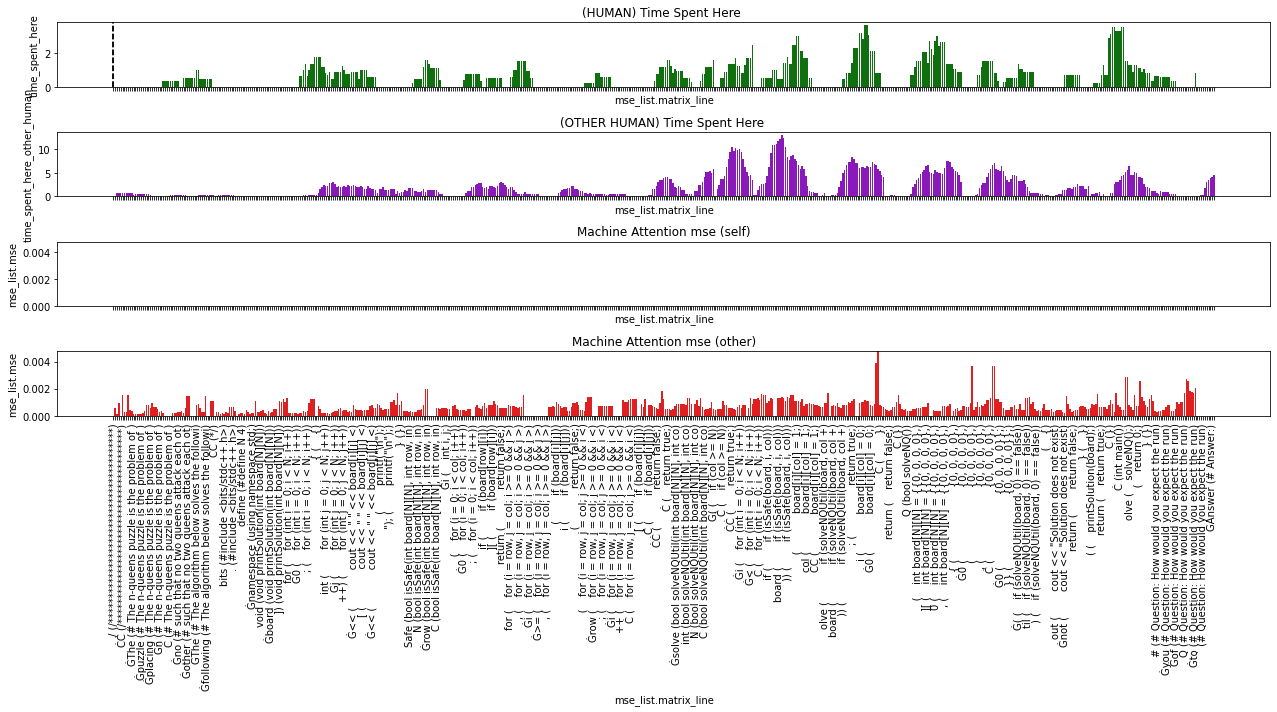

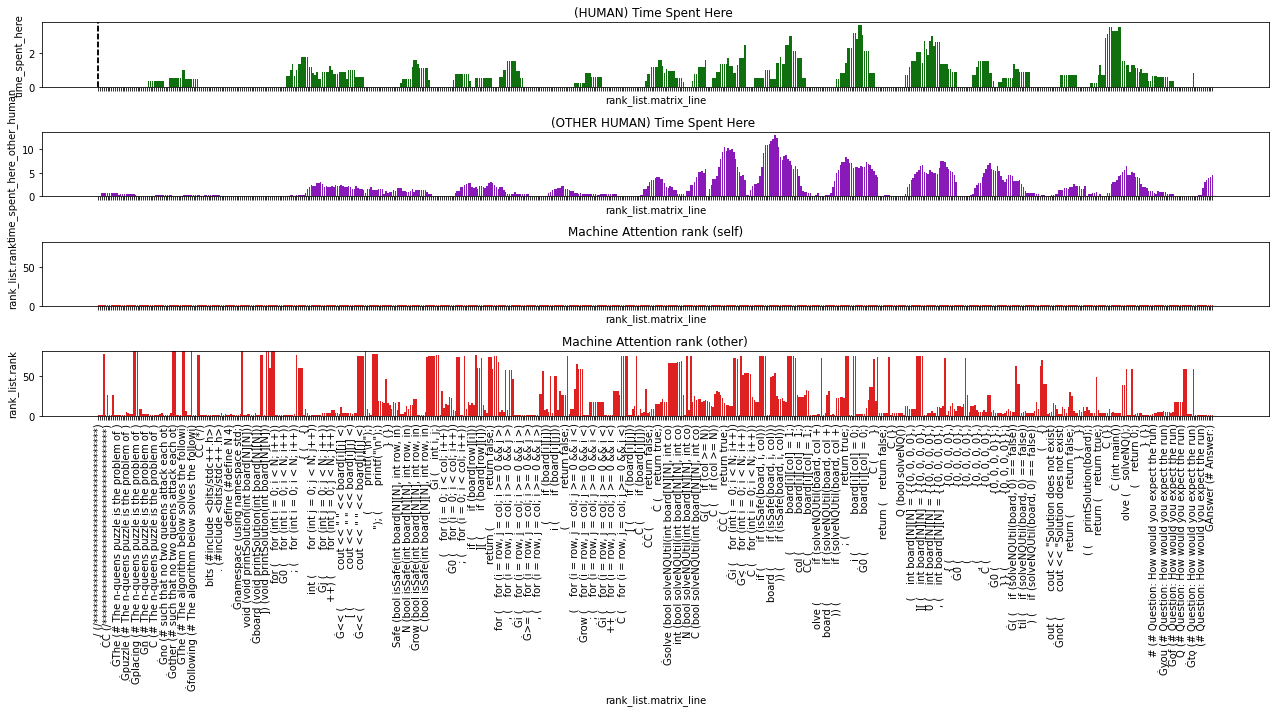

In [104]:
plot_attention(
    attention_infos=[
        {
            "name": "self", 
            "data": human_data_line
        },
        {
            "name": "other",
            "data": to_line_level_attention(other_human_data, model_tokenization)
        }
    ],
    comparison_infos=comparison_infos,
    human_data=human_data_line,
    human_metadata=human_metadata,
    machine_data=human_data_line,  # note here
    machine_metadata=machine_metadata,
    human_vector=human_vector,
    other_human_vector=other_human_vector,
)

# Compare predicted distributions

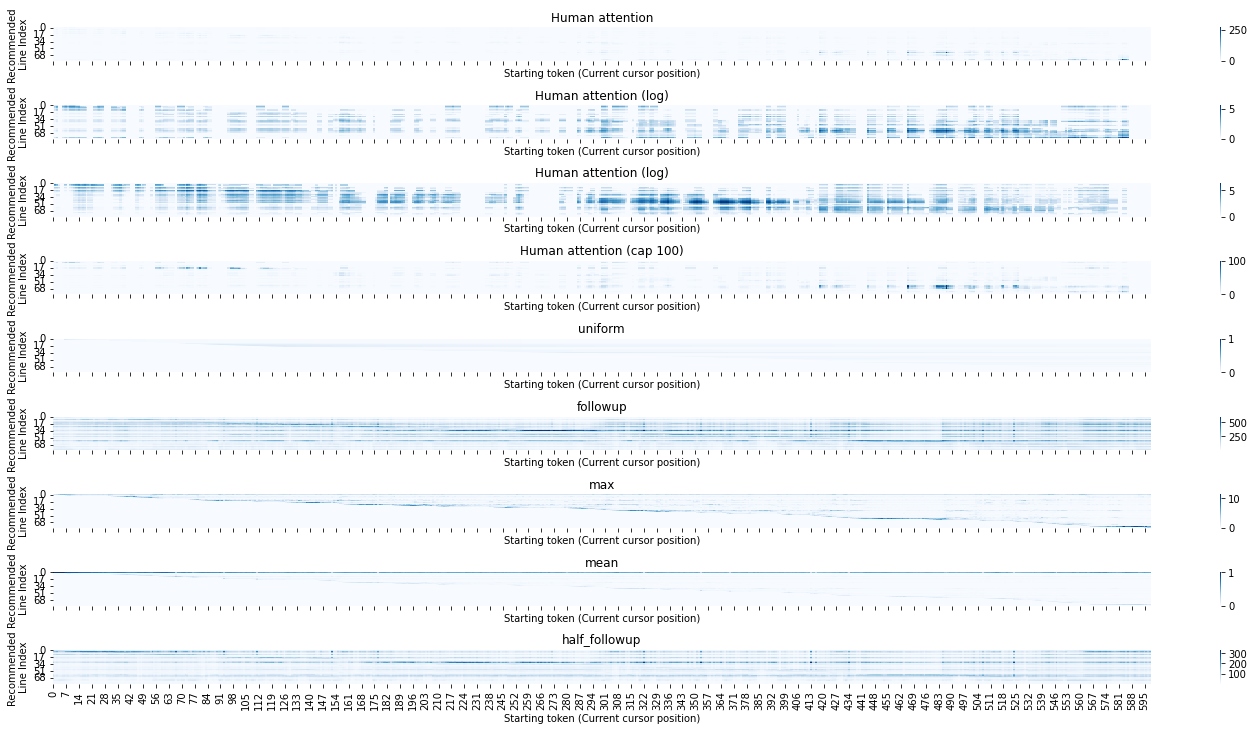

In [129]:
n_attentions = len(attention_infos_line)

N_HUMAN_PLOTS = 4
fig, axes = plt.subplots(
    n_attentions + N_HUMAN_PLOTS , 1, figsize=(20, 10),
    sharex=True, sharey=True)
ax_human = axes[0]
sns.heatmap(
    data=np.transpose(human_data_line),
    cmap="Blues",
    ax=ax_human
)
ax_human.set_title("Human attention")
ax_human.set_ylabel("Recommended\nLine Index")
ax_human.set_xlabel("Starting token (Current cursor position)")

ax_human_log = axes[1]
human_data_line_no_nan = 1 + np.nan_to_num(human_data_line.numpy())
sns.heatmap(
    data=np.log(np.transpose(human_data_line_no_nan)),
    cmap="Blues",
    ax=ax_human_log
)
ax_human_log.set_title("Human attention (log)")

ax_other_human_log = axes[2]
other_human_data_line = to_line_level_attention(other_human_data, model_tokenization)
other_human_data_line_no_nan = 1 + np.nan_to_num(other_human_data_line.numpy())
sns.heatmap(
    data=np.log(np.transpose(other_human_data_line_no_nan)),
    cmap="Blues",
    ax=ax_other_human_log
)
ax_other_human_log.set_title("Other Human attention (log)")

ax_human_cap = axes[3]
MAX_CAP = 100
sns.heatmap(
    data=np.transpose(human_data_line),
    cmap="Blues",
    vmax=MAX_CAP,
    ax=ax_human_cap
)
ax_human_cap.set_title(f"Human attention (cap {MAX_CAP})")

for i_att, att_info in enumerate(attention_infos_line):
    ax = axes[i_att + N_HUMAN_PLOTS]
    sns.heatmap(
        data=np.transpose(att_info["data"]),
        cmap="Blues",
        ax=ax
    )
    ax.set_title(att_info["name"])

plt.tight_layout()

for ax in axes:
    ax.set_ylabel("Recommended\nLine Index")
    ax.set_xlabel("Starting token (Current cursor position)")

# Group different token types

# Miscellanea

(0.0, 0.0001)

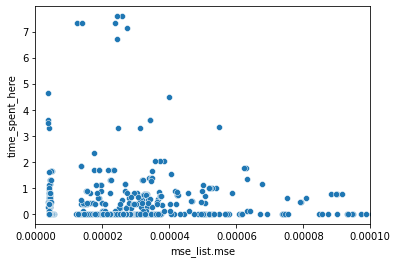

In [99]:
sns.scatterplot(
    data=df_distance_err,
    x="mse_list.mse",
    y="time_spent_here",
)
plt.xlim(0, 0.0001)

Average MSE: 2.7469530985659658e-05


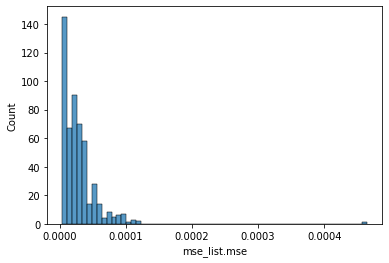

In [94]:
sns.histplot(
    data=df_distance_err,
    x="mse_list.mse",
)
print(f"Average MSE: {df_distance_err['mse_list.mse'].mean()}")

<AxesSubplot:xlabel='mse_list.mse', ylabel='time_spent_here'>

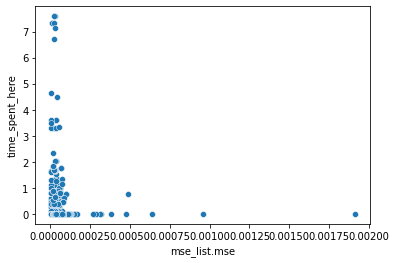

In [84]:
# UNIFORM ATTENTION
sns.scatterplot(
    data=df_distance_err,
    x="mse_list.mse",
    y="time_spent_here",
)

Average MSE: 4.796206452075302e-05


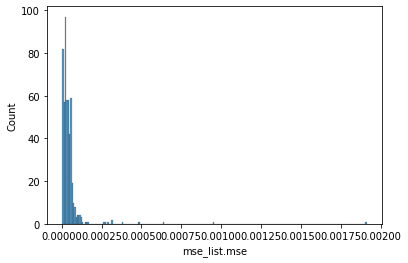

In [88]:
# UNIFORM ATTENTION
sns.histplot(
    data=df_distance_err,
    x="mse_list.mse",
)
print(f"Average MSE: {df_distance_err['mse_list.mse'].mean()}")

# Inspect uniform attention matrix

In [32]:
all_metadata_machine = read_data_in_parallel(
    os.path.join(MACHINE_FOLDER, "metadata"),
    file_type_extension=".json",
)

n of data read:  135


In [33]:
all_metadata_machine.keys()

dict_keys(['Nqueens_Q1.cpp_0_Salesforce_codegen-16B-multi', 'Nqueens_Q1.cpp_1_Salesforce_codegen-16B-multi', 'Nqueens_Q1.cpp_2_Salesforce_codegen-16B-multi', 'Nqueens_Q1.cs_0_Salesforce_codegen-16B-multi', 'Nqueens_Q1.cs_1_Salesforce_codegen-16B-multi', 'Nqueens_Q1.cs_2_Salesforce_codegen-16B-multi', 'Nqueens_Q1.py_0_Salesforce_codegen-16B-multi', 'Nqueens_Q1.py_1_Salesforce_codegen-16B-multi', 'Nqueens_Q1.py_2_Salesforce_codegen-16B-multi', 'Nqueens_Q2.cpp_0_Salesforce_codegen-16B-multi', 'Nqueens_Q2.cpp_1_Salesforce_codegen-16B-multi', 'Nqueens_Q2.cpp_2_Salesforce_codegen-16B-multi', 'Nqueens_Q2.cs_0_Salesforce_codegen-16B-multi', 'Nqueens_Q2.cs_1_Salesforce_codegen-16B-multi', 'Nqueens_Q2.cs_2_Salesforce_codegen-16B-multi', 'Nqueens_Q2.py_0_Salesforce_codegen-16B-multi', 'Nqueens_Q2.py_1_Salesforce_codegen-16B-multi', 'Nqueens_Q2.py_2_Salesforce_codegen-16B-multi', 'Nqueens_Q3.cpp_0_Salesforce_codegen-16B-multi', 'Nqueens_Q3.cpp_1_Salesforce_codegen-16B-multi', 'Nqueens_Q3.cpp_2_Sal

In [16]:
TARGET_PROCESSING = "followup"

In [98]:
import random 
# set seed
random.seed(42)
X = 10 
# sample X files
data_folder = os.path.join(MACHINE_FOLDER, TARGET_PROCESSING) 
files = os.listdir(data_folder)
# sample X files
sample_files = random.sample(files, X)
sample_files

['hannoi_Q1.cpp_1_Salesforce_codegen-16B-multi.npy',
 'Nqueens_Q1.py_0_Salesforce_codegen-16B-multi.npy',
 'multithread_Q2.py_1_Salesforce_codegen-16B-multi.npy',
 'multithread_Q1.py_2_Salesforce_codegen-16B-multi.npy',
 'multithread_Q1.cs_0_Salesforce_codegen-16B-multi.npy',
 'hannoi_Q1.py_2_Salesforce_codegen-16B-multi.npy',
 'Nqueens_Q3.py_2_Salesforce_codegen-16B-multi.npy',
 'Nqueens_Q3.cs_1_Salesforce_codegen-16B-multi.npy',
 'triangle_Q1.cpp_0_Salesforce_codegen-16B-multi.npy',
 'Nqueens_Q1.py_2_Salesforce_codegen-16B-multi.npy']

In [99]:
from attwizard.script.utils import load_json_file
# HUMAN - METADATA
all_human_metadata = read_data_in_parallel(
    base_folder=os.path.join(HUMAN_FOLDER, "metadata"),
    file_type_extension=".json",
    read_function=load_json_file)
all_human_metadata.keys()
# HUMAN - DATA
all_human_data = read_data_in_parallel(
    base_folder=os.path.join(HUMAN_FOLDER, "decay_0.1", "data_followup_tokens_tokens_model"),
    file_type_extension=".npy",
    read_function=np.load)
all_human_data.keys()
    

n of data read:  59
n of data read:  59


dict_keys(['0480e5', '08147e', '09601c', '155d45', '161f21', '1d5b6a', '2babb5', '300bd1', '38606b', '3b0e57', '3d9b54', '3e474f', '4022a9', '403482', '448383', '44d4f6', '44e060', '4a262b', '4c260d', '500208', '5403f5', '56f44e', '5a70af', '5bf279', '6695fa', '675fc1', '6831ef', '7740fd', '7a600a', '81a0b9', '842f7a', '88a0ee', '88a31c', '97a19f', '9e5778', '9fd0c1', 'a4a47a', 'ab1e99', 'afc047', 'b0172f', 'b595bc', 'b5c173', 'b6cb6e', 'bda0b1', 'c35fdf', 'c46f82', 'c6d8ff', 'c7ca22', 'cbdc06', 'd3a4b4', 'd401e5', 'd41dd8', 'debcce', 'df2957', 'e0495f', 'e33aac', 'e84aa9', 'f4bbec', 'f5e35b'])

In [100]:
all_machine_data = read_data_in_parallel(
    os.path.join(MACHINE_FOLDER, TARGET_PROCESSING), 
    file_type_extension=".npy",
    extra_filter_regex="|".join(sample_files),
)

n of data read:  10


In [101]:
all_machine_data.keys()

dict_keys(['Nqueens_Q1.py_0_Salesforce_codegen-16B-multi', 'Nqueens_Q1.py_2_Salesforce_codegen-16B-multi', 'Nqueens_Q3.cs_1_Salesforce_codegen-16B-multi', 'Nqueens_Q3.py_2_Salesforce_codegen-16B-multi', 'hannoi_Q1.cpp_1_Salesforce_codegen-16B-multi', 'hannoi_Q1.py_2_Salesforce_codegen-16B-multi', 'multithread_Q1.cs_0_Salesforce_codegen-16B-multi', 'multithread_Q1.py_2_Salesforce_codegen-16B-multi', 'multithread_Q2.py_1_Salesforce_codegen-16B-multi', 'triangle_Q1.cpp_0_Salesforce_codegen-16B-multi'])


## On code heatmap

In [102]:
from attwizard.attention_postprocessing import compute_mean_of_followers
# convert to vectors
all_machine_data_vectors = {
    k: compute_mean_of_followers(v) for k, v in all_machine_data.items()
}
# convert tensors to numpy arrays
all_machine_data_vectors = {
    k: v.numpy() for k, v in all_machine_data_vectors.items()
}

In [103]:
TARGET_FILE = sample_files[1].replace(".npy", "")
TARGET_FILE

'Nqueens_Q1.py_0_Salesforce_codegen-16B-multi'

This considers only the prompt itself, not the generated code.


(<Figure size 706.8x1123.2 with 1 Axes>, <AxesSubplot:>)

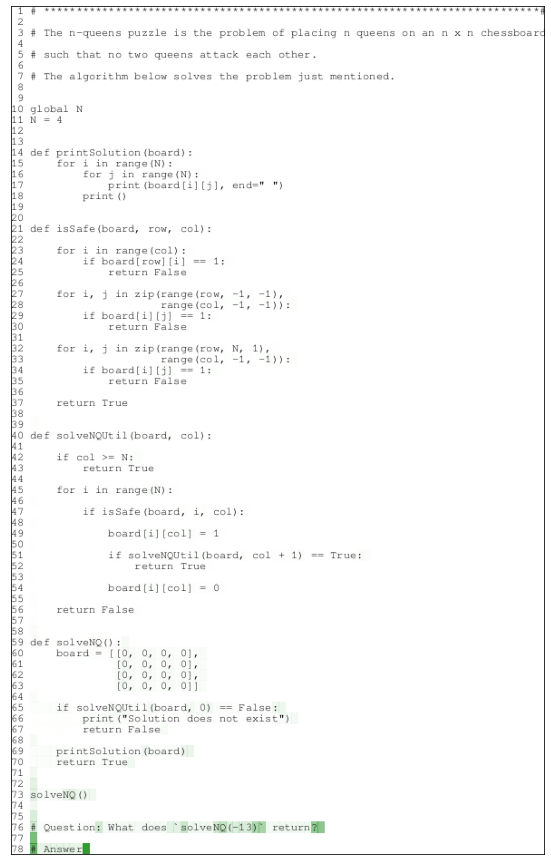

In [104]:
from attwizard.visualizer.eda import visualize_code_heatmap_codegen

visualize_code_heatmap_codegen(
    filename=TARGET_FILE,
    all_machine_data_vectors=all_machine_data_vectors,
    all_machine_data_metadata=all_metadata_machine,
)


## Artificially uniform

In [105]:
SIZE = all_machine_data_vectors[TARGET_FILE].shape[0]
matrix = np.tril(np.ones((SIZE, SIZE)))
# normalize matrix by line
matrix = matrix / matrix.sum(axis=1, keepdims=True)
matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00220264, 0.00220264, 0.00220264, ..., 0.00220264, 0.        ,
        0.        ],
       [0.0021978 , 0.0021978 , 0.0021978 , ..., 0.0021978 , 0.0021978 ,
        0.        ],
       [0.00219298, 0.00219298, 0.00219298, ..., 0.00219298, 0.00219298,
        0.00219298]])

In [106]:
vector_of_weigths = compute_mean_of_followers(matrix)
fake_data_vectors = {TARGET_FILE: vector_of_weigths.numpy()}
fake_data_vectors.keys()

dict_keys(['Nqueens_Q1.py_0_Salesforce_codegen-16B-multi'])

This considers only the prompt itself, not the generated code.


(<Figure size 706.8x1123.2 with 1 Axes>, <AxesSubplot:>)

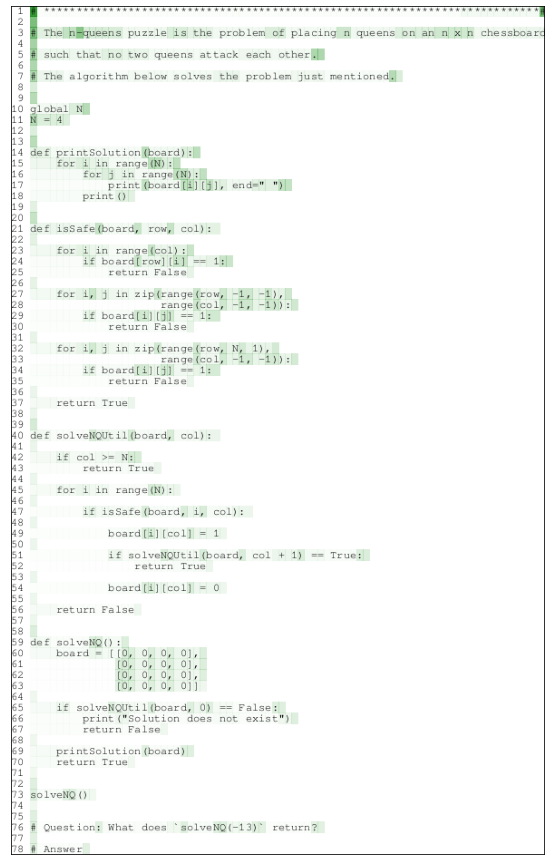

In [107]:
visualize_code_heatmap_codegen(
    filename=TARGET_FILE,
    all_machine_data_vectors=fake_data_vectors,
    all_machine_data_metadata=all_metadata_machine,
)

## On pure matrix
Compare the uniform vs the ground truth attention
both NORMALIZED and not normalized

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

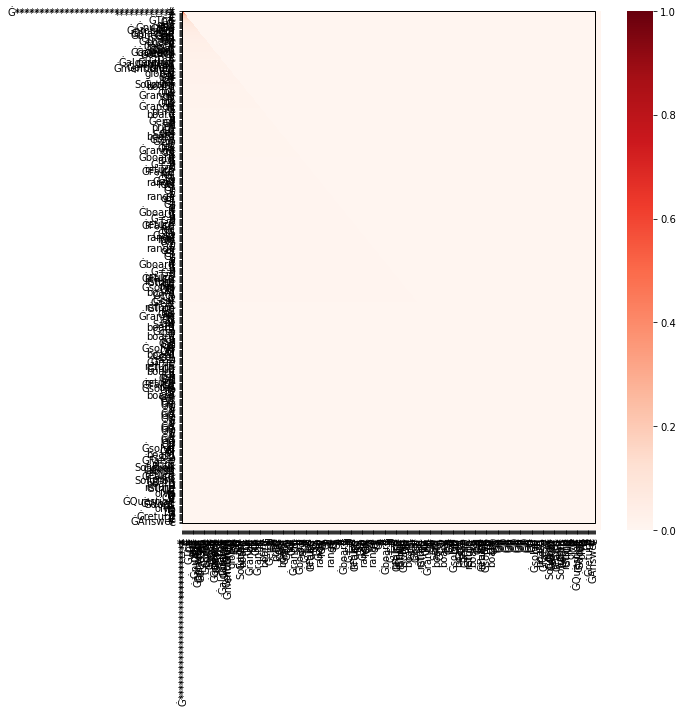

In [108]:
from attwizard.visualizer.matrix import heatmap_visualize

TARGET_TOKENS = all_metadata_machine[TARGET_FILE]["tokens_prompt"]
heatmap_visualize(
    attention_matrix=matrix,
    token_names=TARGET_TOKENS,
    n_input_tokens=len(TARGET_TOKENS),
)

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

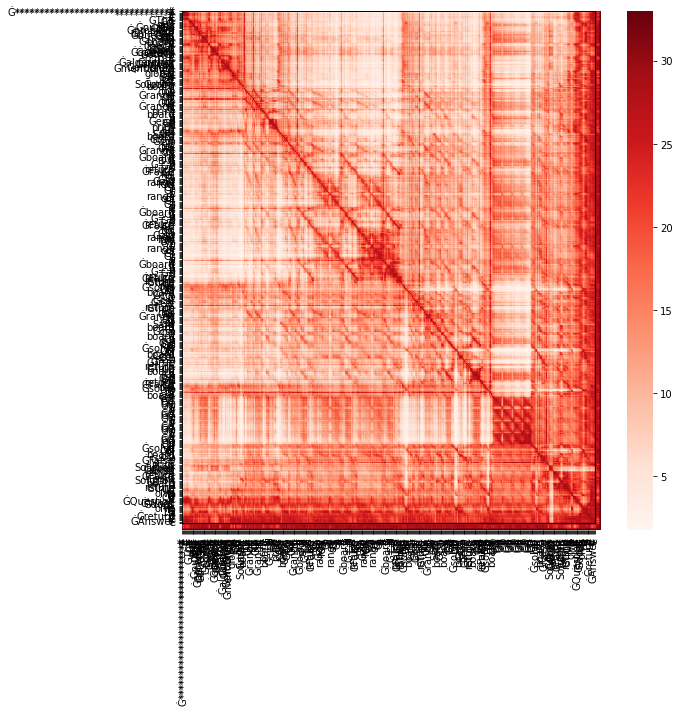

In [109]:
heatmap_visualize(
    attention_matrix=all_machine_data[TARGET_FILE],
    token_names=TARGET_TOKENS,
    n_input_tokens=len(TARGET_TOKENS),
)

In [110]:
first_key = list(all_human_metadata.keys())[0]
first_metadata = all_human_metadata[first_key]
first_metadata.keys()

dict_keys(['user_name', 'task_number', 'source_code', 'tokenization', 'raw_text'])

In [111]:
first_metadata["source_code"]

'python/tree_Q2.py'

In [112]:
TARGET_FILE

'Nqueens_Q1.py_0_Salesforce_codegen-16B-multi'

In [113]:
TARGET_FILE_SOURCE = "_".join(TARGET_FILE.split("_")[:2])
TARGET_FILE_SOURCE

'Nqueens_Q1.py'

In [114]:
# PLOT CORRESPONDING HUMAN
elegible_human_files = [
    k for k, v in all_human_metadata.items() 
    if v["source_code"].endswith(TARGET_FILE_SOURCE)
]
elegible_human_files

['3e474f']

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

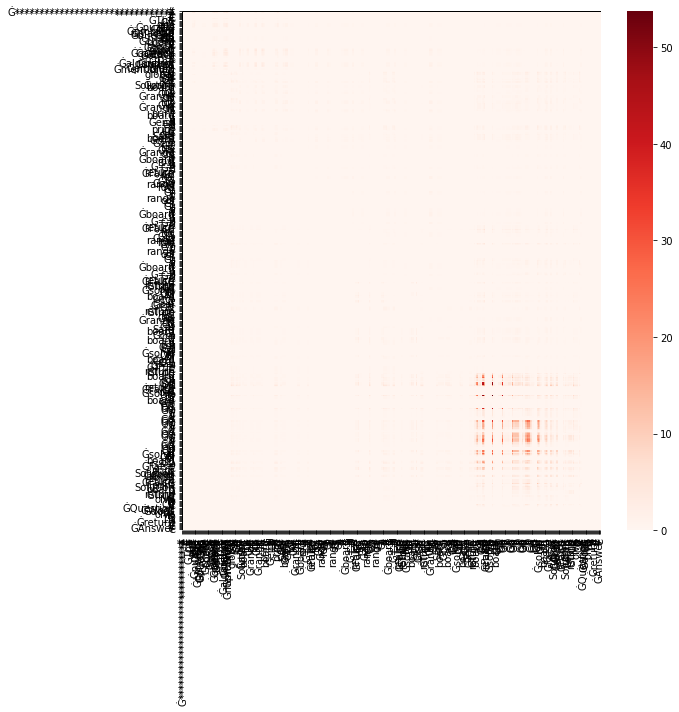

In [115]:
CORRESPONDING_HUMAN_FILE = elegible_human_files[0]
heatmap_visualize(
    attention_matrix=all_human_data[CORRESPONDING_HUMAN_FILE],
    token_names=TARGET_TOKENS,
    n_input_tokens=len(TARGET_TOKENS),
)

/tmp/ipykernel_1125342/3330872708.py:3: RuntimeWarning: invalid value encountered in divide
  human_matrix = human_matrix / human_matrix.sum(axis=1, keepdims=True)


(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

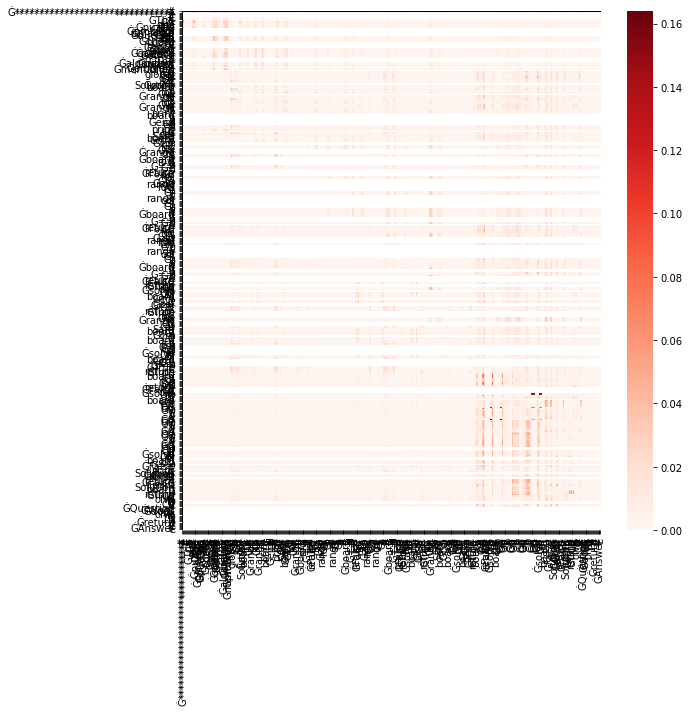

In [116]:
human_matrix = all_human_data[CORRESPONDING_HUMAN_FILE]
# normalize matrix by line
human_matrix = human_matrix / human_matrix.sum(axis=1, keepdims=True)
heatmap_visualize(
    attention_matrix=human_matrix,
    token_names=TARGET_TOKENS,
    n_input_tokens=len(TARGET_TOKENS),
)

# Inspect failing cases

# MSE

In [117]:
# Read all data

COMPARISON_FOLDER = "cmp_v02"
PATH_COMPARISON_FOLDER = f'../data/comparisons/{COMPARISON_FOLDER}/'
# LOAD ALL DATA
available_comparisons = os.listdir(PATH_COMPARISON_FOLDER)
dfs = []
for comparison in available_comparisons:
    dfs.append(pd.read_csv(os.path.join(PATH_COMPARISON_FOLDER, comparison)))
DF = pd.concat(dfs)
DF["comparison_name"].unique()



array(['naive_max_matrix_mrr', 'followup_matrix_hr_no_spaces_nor_eol',
       'rollout_matrix', 'followup_matrix_spearman_rank',
       'followup_matrix_mrr', 'naive_max_matrix_hr_no_spaces_nor_eol',
       'followup_matrix_jsd', 'uniform_baseline', 'followup_matrix',
       'followup_matrix_harmonic_rank', 'transitive_matrix_right',
       'plain_weights', 'naive_max_matrix_spearman_rank',
       'transitive_matrix_left', 'followup_matrix_harmonic_rank_backward',
       'naive_max_matrix_jsd', 'naive_max_matrix_harmonic_rank',
       'naive_max_matrix_harmonic_rank_backward', 'naive_max_matrix'],
      dtype=object)

(0.0, 0.0002)

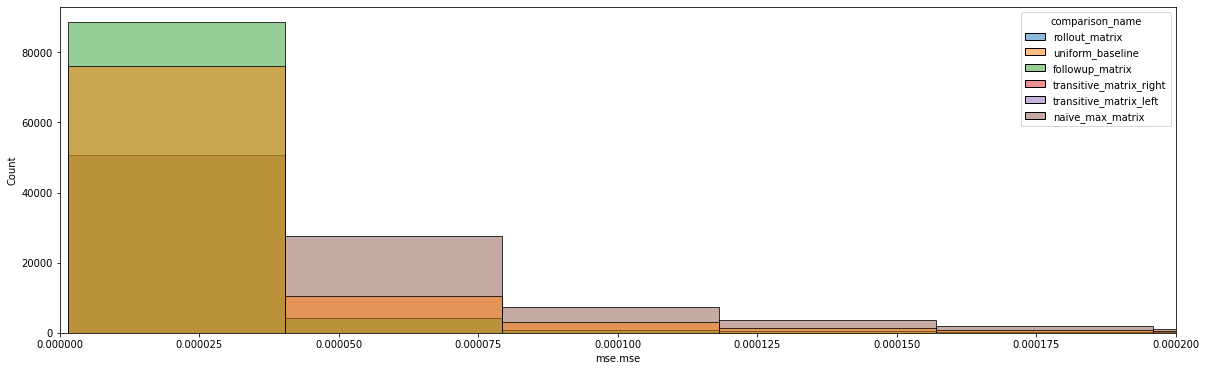

In [120]:
from attwizard.analysis_pass.data_helper import explode_column_with_list_of_tuples


df_selection = DF[
    (DF["comparison_name"].isin([
        "followup_matrix", "naive_max_matrix",
        "uniform_baseline", 
        "rollout_matrix", 
        "transitive_matrix_right", 
        "transitive_matrix_left"
    ]))]
columns_to_explode = ["mse_list"]
  
df_selection = explode_column_with_list_of_tuples(
    df_selection, 
    columns_to_explode,
    new_column_names=["mse", "line_number"])

fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(
    data=df_selection,
    x="mse.mse",
    hue="comparison_name",
    kde=False,
    ax=ax
)
plt.xlim(0, .0002)

In [119]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566802 entries, 0 to 566801
Data columns (total 34 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   comparison_name                                     566802 non-null  object 
 1   comparison_function                                 566802 non-null  object 
 2   source_code                                         566802 non-null  object 
 3   user_name                                           566802 non-null  object 
 4   task_number                                         566802 non-null  int64  
 5   input_human_filestem                                566802 non-null  object 
 6   input_machine_filestem                              566802 non-null  object 
 7   comparison_type                                     566802 non-null  object 
 8   mrr                                                 0 non-null  

In [121]:
# attach the token content from the machine metadata
df_selection["token_content"] = df_selection.apply(
    lambda row: all_metadata_machine[row["input_machine_filestem"]]["tokens_prompt"][int(row["mse.line_number"])], 
    axis=1)

rollout_matrix
Total mse computed for this comparison: 94467
Good predictions 300: low mse


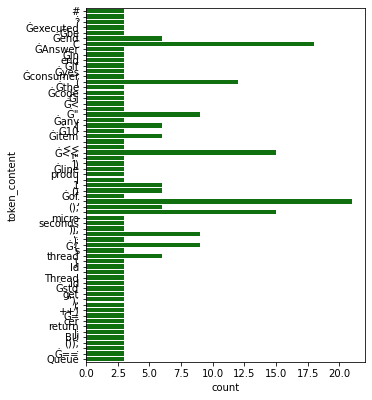

Bad predictions 300: high mse


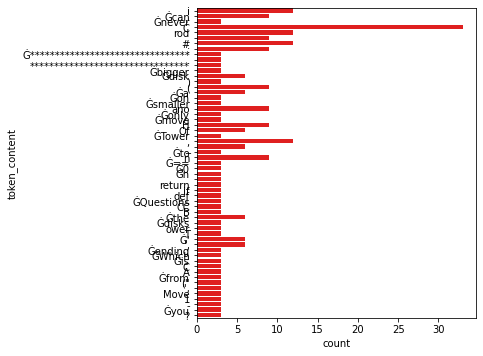

uniform_baseline
Total mse computed for this comparison: 94467
Good predictions 300: low mse


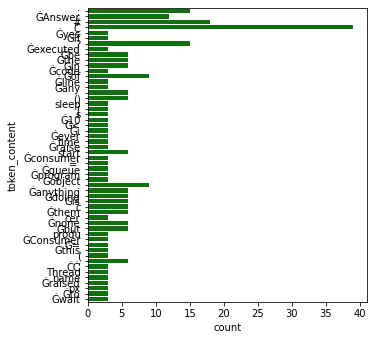

Bad predictions 300: high mse


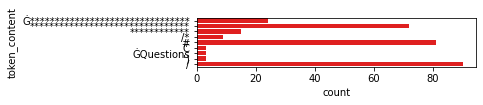

followup_matrix
Total mse computed for this comparison: 94467
Good predictions 300: low mse


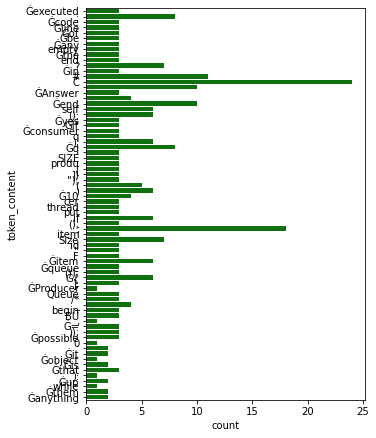

Bad predictions 300: high mse


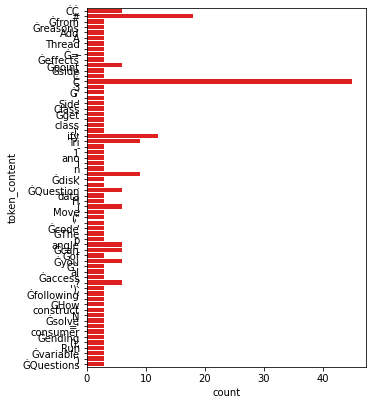

transitive_matrix_right
Total mse computed for this comparison: 94467
Good predictions 300: low mse


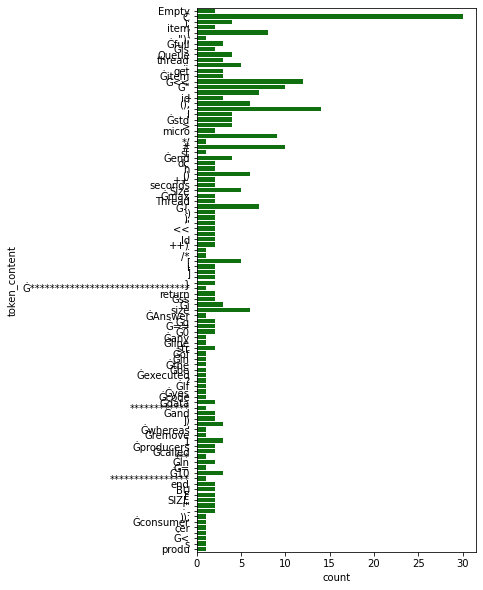

Bad predictions 300: high mse


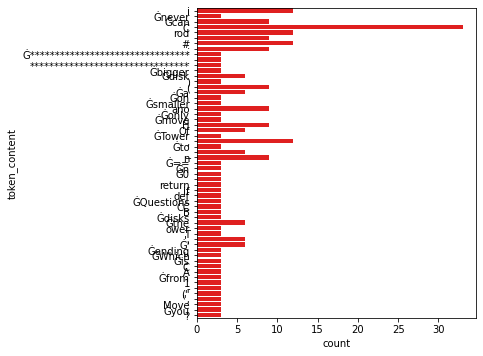

transitive_matrix_left
Total mse computed for this comparison: 94467
Good predictions 300: low mse


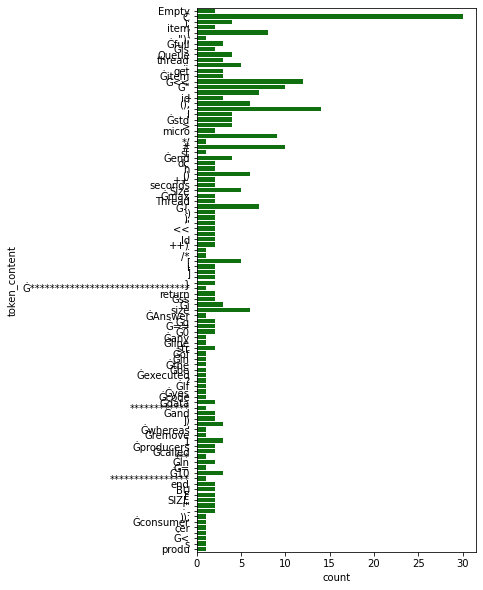

Bad predictions 300: high mse


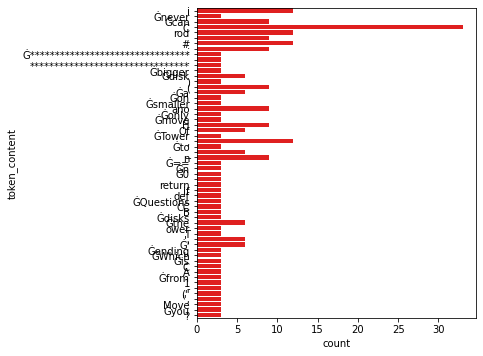

naive_max_matrix
Total mse computed for this comparison: 94467
Good predictions 300: low mse


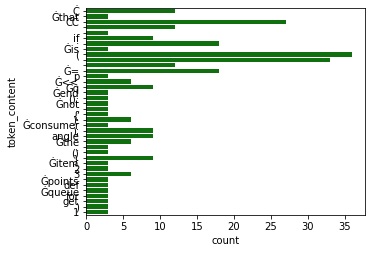

Bad predictions 300: high mse


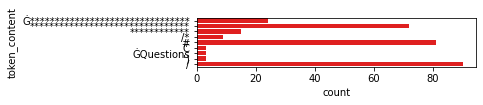

In [138]:
from collections import Counter
from turtle import color

def show_most_common_tokens(df, color):
    token_counter = Counter(df["token_content"])
    n_unique_tokens = len(token_counter)
    fig, ax = plt.subplots(figsize=(5, .1 * n_unique_tokens))
    sns.countplot(
        data=df,
        y="token_content",
        ax=ax,
        color=color,
    )
    plt.show()

for comparison in df_selection["comparison_name"].unique():
    print("=" * 80)
    print(comparison)
    df_comparison = df_selection[df_selection["comparison_name"] == comparison]

    # sort by mse
    df_comparison = df_comparison.sort_values(by="mse.mse")
    assert df_comparison.iloc[0]['mse.mse'] <= df_comparison.iloc[-1]['mse.mse']
    K = 300
    print(f"Total mse computed for this comparison: {len(df_comparison)}")
    # print top k
    print(f"Good predictions {K}: low mse")
    show_most_common_tokens(df_comparison.iloc[:K], color="Green")
    # print bottom k
    print(f"Bad predictions {K}: high mse")
    show_most_common_tokens(df_comparison.iloc[-K:], color="Red")


## Check if CodeGen and Gpt-J have the same tokenization

In [1]:
gtpj_file = '../data/model_output/exp_v10/gpt-j/metadata/hannoi_Q1.cpp_0_EleutherAI_gpt-j-6B.json'
codegen_file = '../data/model_output/exp_v10/codegen/metadata/hannoi_Q1.cpp_0_Salesforce_codegen-16B-multi.json'

In [3]:
import json
g = json.load(open(gtpj_file))
c = json.load(open(codegen_file))
assert g["tokens_prompt"] == c["tokens_prompt"]

AssertionError: 

In [7]:
from pprint import pprint
pprint(g["tokens_prompt"])

['/',
 '********************************',
 '********************************',
 '********************************',
 '*/',
 'ĊĊ',
 'Ċ',
 '/*',
 'Ċ',
 '#',
 'ĠIn',
 'Ġthe',
 'ĠTower',
 'Ġof',
 'ĠH',
 'ano',
 'i',
 'Ġproblem',
 'Ġyou',
 'Ġhave',
 'Ġto',
 'Ġmove',
 'Ġall',
 'Ġthe',
 'Ġdisks',
 'Ċ',
 'Ċ',
 '#',
 'Ġfrom',
 'Ġthe',
 'Ġleft',
 'Ġhand',
 'Ġpost',
 'Ġto',
 'Ġthe',
 'Ġright',
 'Ġhand',
 'Ġpost',
 '.',
 'Ċ',
 'Ċ',
 '#',
 'ĠYou',
 'Ġcan',
 'Ġonly',
 'Ġmove',
 'Ġthe',
 'Ġdisks',
 'Ġone',
 'Ġat',
 'Ġa',
 'Ġtime',
 'Ġand',
 'Ġyou',
 'Ġcan',
 'Ġnever',
 'Ċ',
 'Ċ',
 '#',
 'Ġplace',
 'Ġa',
 'Ġbigger',
 'Ġdisk',
 'Ġon',
 'Ġa',
 'Ġsmaller',
 'Ġdisk',
 '.',
 'Ċ',
 'Ġ*/',
 'Ċ',
 'Ċ',
 '#',
 'include',
 'Ġ<',
 'bits',
 '/',
 'st',
 'dc',
 '++',
 '.',
 'h',
 '>',
 'Ċ',
 'using',
 'Ġnamespace',
 'Ġstd',
 ';',
 'Ċ',
 'Ċ',
 'void',
 'Ġtower',
 'Of',
 'H',
 'ano',
 'i',
 '(',
 'int',
 'Ġn',
 ',',
 'Ġchar',
 'Ġfrom',
 '_',
 'rod',
 ',',
 'Ċ',
 'Ġ',
 'Ġ',
 'Ġ',
 'Ġ',
 'Ġ',
 'Ġ',
 'Ġ',
 'Ġ',
 'Ġ',


In [8]:

pprint(c["tokens_prompt"])

['/',
 '********************************',
 '********************************',
 '********************************',
 '*/',
 'ĊĊ',
 'Ċ',
 '/*',
 'Ċ',
 '#',
 'ĠIn',
 'Ġthe',
 'ĠTower',
 'Ġof',
 'ĠH',
 'ano',
 'i',
 'Ġproblem',
 'Ġyou',
 'Ġhave',
 'Ġto',
 'Ġmove',
 'Ġall',
 'Ġthe',
 'Ġdisks',
 'Ċ',
 'Ċ',
 '#',
 'Ġfrom',
 'Ġthe',
 'Ġleft',
 'Ġhand',
 'Ġpost',
 'Ġto',
 'Ġthe',
 'Ġright',
 'Ġhand',
 'Ġpost',
 '.',
 'Ċ',
 'Ċ',
 '#',
 'ĠYou',
 'Ġcan',
 'Ġonly',
 'Ġmove',
 'Ġthe',
 'Ġdisks',
 'Ġone',
 'Ġat',
 'Ġa',
 'Ġtime',
 'Ġand',
 'Ġyou',
 'Ġcan',
 'Ġnever',
 'Ċ',
 'Ċ',
 '#',
 'Ġplace',
 'Ġa',
 'Ġbigger',
 'Ġdisk',
 'Ġon',
 'Ġa',
 'Ġsmaller',
 'Ġdisk',
 '.',
 'Ċ',
 'Ġ*/',
 'Ċ',
 'Ċ',
 '#',
 'include',
 'Ġ<',
 'bits',
 '/',
 'st',
 'dc',
 '++',
 '.',
 'h',
 '>',
 'Ċ',
 'using',
 'Ġnamespace',
 'Ġstd',
 ';',
 'Ċ',
 'Ċ',
 'void',
 'Ġtower',
 'Of',
 'H',
 'ano',
 'i',
 '(',
 'int',
 'Ġn',
 ',',
 'Ġchar',
 'Ġfrom',
 '_',
 'rod',
 ',',
 'Ċ',
 '                    ',
 'char',
 'Ġto',
 '_',
 'rod'

In [6]:
# check all the elements and print the first different one
for i, (g_token, c_token) in enumerate(zip(g["tokens_prompt"], c["tokens_prompt"])):
    if g_token != c_token:
        print(f"{i}: {g_token} != {c_token}")
        break

106: Ġ !=                     
